# 1. Installing the required libraries

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scipy 
!{sys.executable} -m pip install sklearn 
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow

# 2. Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 3. Importing the data

* The dataset used here is `sgsc-ev-electric-vehicles-data.csv` and read using pandas `read_csv()` function.
* Top 5 rows are shown using the `head()` function.

In [3]:
data = pd.read_csv('sgsc-ev-electric-vehicles-data.csv')
data.head()

,TEL_TRIPSTART,TEL_STARTODO,TEL_TRIPEND,TEL_ENDODO,TEL_SOC_START,TEL_SOC_END,TEL_AVG_VELOCITY,AC_ON_DURATION,AC_ON_PCT,HEADLAMP_ON_DURATION,HEADLAMP_ON_PCT,TRIPSTART_LOCN,TRIPEND_LOCN,TEMPERATURE,CHARGE_TYPE,CONNECT_START,CHARGE_START,CONNECT_END,CHARGE_END,CHARGE_AMOUNT,FULLCHARGEFLAG,CHARGING_OCCURRENCES,UNACCOUNTED_KM,FULLCHARGE_KMSPAN,FULLCHARGE_EFFICIENCY,FULLCHARGE_AMOUNT,TRIP_ID,CALENDAR_KEY,VEHICLE_ID,RECSTARTDATE,RECENDDATE,START_DATE,START_ODO_ACTUAL,START_BAT_EST,START_BAT_ACTUAL,END_DATE,END_ODO_EST,END_ODO_ACTUAL,END_BAT_EST,END_BAT_ACTUAL,TRIP_DISTANCE,DISTANCE_GPS,TEL_DISTANCE,CALC_DISTANCE,NO_PASSENGERS,ACCESSORIES,LOG_AVG_VELOCITY,GPS_AVG_VELOCITY,START_ALTITUDE,END_ALTITUDE
0,01:51.8,9681.0,04:50.8,9682.0,86.0,86.0,20.00,0.00,0.0,2.98,NaN,Other,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0.0,9.0,0.0,0.0,15809,270742,9,01:51.8,04:50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,57:29.2,17784.0,12:46.2,17785.0,79.0,77.0,4.00,15.28,NaN,0.00,0.0,Other,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,18751,270747,10,57:29.2,12:46.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,54:51.9,9776.0,04:31.9,9782.0,78.0,74.0,36.00,0.00,0.0,9.67,NaN,Home,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,8529,270747,7,54:53.0,02:44.0,54:53.0,9776.0,13.0,13.0,02:44.0,9781.0,9782.0,13.0,12.0,5.0,NaN,6.0,6,1.0,[NONE],37.50,0.0,NaN,NaN
3,01:26.8,12362.0,34:27.9,12393.0,97.0,69.0,56.36,0.00,0.0,0.00,0.0,Home,Work,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,12108,270748,8,02:06.0,30:26.0,02:06.0,12362.0,2.0,16.0,30:26.0,12393.0,12393.0,11.0,11.0,31.0,NaN,31.0,31,1.0,[NONE],66.43,0.0,NaN,NaN
4,07:59.3,25665.0,44:42.4,25699.0,103.0,78.0,55.14,0.00,0.0,0.00,0.0,Home,Work,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,39702,270748,17,07:46.0,43:18.0,07:46.0,25665.0,4.0,16.0,43:18.0,25698.0,25699.0,11.0,13.0,33.0,NaN,34.0,34,1.0,[NONE],55.00,0.0,NaN,NaN


* The `info()` fucntion give us the info about the datatype, number of non null observations and memory usage information about the data.
* Initially there are:
    * 30 Float type
    * 6 Int type
    * 14 object type variables.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26155 entries, 0 to 26154
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TEL_TRIPSTART           21602 non-null  object 
 1    TEL_STARTODO           21602 non-null  float64
 2    TEL_TRIPEND            21602 non-null  object 
 3    TEL_ENDODO             21602 non-null  float64
 4    TEL_SOC_START          21602 non-null  float64
 5    TEL_SOC_END            21602 non-null  float64
 6    TEL_AVG_VELOCITY       21602 non-null  float64
 7    AC_ON_DURATION         21602 non-null  float64
 8    AC_ON_PCT              13072 non-null  float64
 9    HEADLAMP_ON_DURATION   21602 non-null  float64
 10   HEADLAMP_ON_PCT        15290 non-null  float64
 11   TRIPSTART_LOCN         26155 non-null  object 
 12   TRIPEND_LOCN           26155 non-null  object 
 13   TEMPERATURE            0 non-null      float64
 14   CHARGE_TYPE            6672 non-null 

# 4. Data Preprocessing

Preparing the data for further analysis.

## 4.1 Removing white spaces

* Variable/Column names had white spaces in the starting or ending.
* Using `strip()` function to remove white spaces and rename columns using `columns` method. 

In [5]:
data.columns = [i.strip() for i in data.columns]
data.columns

Index(['TEL_TRIPSTART', 'TEL_STARTODO', 'TEL_TRIPEND', 'TEL_ENDODO',
       'TEL_SOC_START', 'TEL_SOC_END', 'TEL_AVG_VELOCITY', 'AC_ON_DURATION',
       'AC_ON_PCT', 'HEADLAMP_ON_DURATION', 'HEADLAMP_ON_PCT',
       'TRIPSTART_LOCN', 'TRIPEND_LOCN', 'TEMPERATURE', 'CHARGE_TYPE',
       'CONNECT_START', 'CHARGE_START', 'CONNECT_END', 'CHARGE_END',
       'CHARGE_AMOUNT', 'FULLCHARGEFLAG', 'CHARGING_OCCURRENCES',
       'UNACCOUNTED_KM', 'FULLCHARGE_KMSPAN', 'FULLCHARGE_EFFICIENCY',
       'FULLCHARGE_AMOUNT', 'TRIP_ID', 'CALENDAR_KEY', 'VEHICLE_ID',
       'RECSTARTDATE', 'RECENDDATE', 'START_DATE', 'START_ODO_ACTUAL',
       'START_BAT_EST', 'START_BAT_ACTUAL', 'END_DATE', 'END_ODO_EST',
       'END_ODO_ACTUAL', 'END_BAT_EST', 'END_BAT_ACTUAL', 'TRIP_DISTANCE',
       'DISTANCE_GPS', 'TEL_DISTANCE', 'CALC_DISTANCE', 'NO_PASSENGERS',
       'ACCESSORIES', 'LOG_AVG_VELOCITY', 'GPS_AVG_VELOCITY', 'START_ALTITUDE',
       'END_ALTITUDE'],
      dtype='object')

In [6]:
data[['LOG_AVG_VELOCITY', 'TEL_DISTANCE']].corr()

,LOG_AVG_VELOCITY,TEL_DISTANCE
LOG_AVG_VELOCITY,1.000000,0.662244
TEL_DISTANCE,0.662244,1.000000


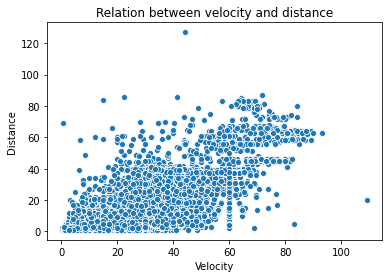

In [7]:
sns.scatterplot(data.LOG_AVG_VELOCITY, data.TEL_DISTANCE)
plt.xlabel('Velocity')
plt.ylabel('Distance')
plt.title("Relation between velocity and distance")
plt.show()

## 4.2 Dropping the missing data

* Removing the columns that do not have any observations.
* Used data filtering to find the columns and dropped using `drop()` function.
* Removing data along the rows considering the column `TRIP_DISTANCE` as this features are important for prediction.
* As from basic domain knowledge about vehicles and efficiency, the efficiency of the fuel(Here electricity) greatly depends uplot the distance travelled.

In [8]:
data.drop(data.isna().columns[data.isna().sum() == data.shape[0]],
          axis=1, 
          inplace=True)
data.dropna(subset=['TRIP_DISTANCE'], axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16201 entries, 2 to 26154
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TEL_TRIPSTART          11648 non-null  object 
 1   TEL_STARTODO           11648 non-null  float64
 2   TEL_TRIPEND            11648 non-null  object 
 3   TEL_ENDODO             11648 non-null  float64
 4   TEL_SOC_START          11648 non-null  float64
 5   TEL_SOC_END            11648 non-null  float64
 6   TEL_AVG_VELOCITY       11648 non-null  float64
 7   AC_ON_DURATION         11648 non-null  float64
 8   AC_ON_PCT              7128 non-null   float64
 9   HEADLAMP_ON_DURATION   11648 non-null  float64
 10  HEADLAMP_ON_PCT        7893 non-null   float64
 11  TRIPSTART_LOCN         16201 non-null  object 
 12  TRIPEND_LOCN           16201 non-null  object 
 13  CHARGE_TYPE            4426 non-null   object 
 14  CONNECT_START          4426 non-null   object 
 15  CH

* After dropping the missing observations we are left with majority of 11648 observations that brings the data around 53.92% of the orignal data.

In [9]:
data[['GPS_AVG_VELOCITY', 'LOG_AVG_VELOCITY']].describe()

,GPS_AVG_VELOCITY,LOG_AVG_VELOCITY
count,16201.0,16201.000000
mean,0.0,30.969108
std,0.0,14.838918
min,0.0,0.370000
25%,0.0,20.690000
50%,0.0,30.000000
75%,0.0,38.460000
max,0.0,109.090000


* From the above summary statistics methos `describe()` it can be seen that we had two velocity variables `GPS_AVG_VELOCITY` and `LOG_AVG_VELOCITY`.
* But `GPS_AVG_VELOCITY` only have zeros in it, so we are going to drop it.

In [10]:
data.drop(['GPS_AVG_VELOCITY'],
          axis=1, 
          inplace=True)

* Now we are going to explore that if the missing data have certain pattern in it?
* That certain vehicle(`VEHICLE_ID`) was missing all the time?

In [11]:
data.VEHICLE_ID.unique()

array([ 7,  8, 17, 12, 18, 16,  9,  5,  6, 20, 19, 23, 13, 11, 14, 10, 21,
       24, 15, 22])

* Checking for any patterent in the `VEHICLE_ID`
* No patterent detected in `VEHICLE_ID`, `CALENDAR_KEY` and `TRIP_ID`.

In [12]:
data.groupby('VEHICLE_ID').agg(['max', 'min'])

TEL_STARTODO          TEL_ENDODO          TEL_SOC_START        \
                    max      min        max      min           max   min   
VEHICLE_ID                                                                 
5               19222.0   4068.0    19250.0   4069.0         104.0  28.0   
6               31932.0   4112.0    31970.0   4121.0         109.0  19.0   
7               13142.0   1713.0    13148.0   1720.0         108.0  20.0   
8               17239.0   1001.0    17269.0   1017.0         108.0  24.0   
9                9930.0   1551.0     9955.0   1556.0         105.0  33.0   
10              18116.0    809.0    18132.0    816.0         109.0  21.0   
11              25448.0   7207.0    25454.0   7227.0         106.0  27.0   
12              14605.0   3721.0    14613.0   3726.0         103.0  15.0   
13              30743.0   8188.0    30746.0   8213.0         106.0  19.0   
14              18218.0  10127.0    18243.0  10145.0         104.0  12.0   
15              17194.0   6374.0    17203.0   6396.0         104.0  13.0   
16              22097.0  14945.0    22114.0  14960.0         104.0  22.0   
17              32920.0  10590.0    32922.0  10636.0         104.0  14.0   
18              19686.0   7069.0    19745.0   7076.0         107.0  36.0   
19              20143.0   2766.0    20146.0   2771.0         104.0  19.0   
20              14942.0    986.0    14956.0   1013.0         108.0  16.0   
21               4458.0    924.0     4461.0    925.0         105.0  19.0   
22               9817.0   3028.0     9844.0   3043.0         109.0  22.0   
23              16070.0   5577.0    16092.0   5592.0         107.0  19.0   
24              17089.0   3583.0    17093.0   3600.0         107.0  14.0   

           TEL_SOC_END      TEL_AVG_VELOCITY       AC_ON_DURATION       \
                   max  min              max   min            max  min   
VEHICLE_ID                                                               
5                 98.0 -5.0            53.51  5.00          87.00  0.0   
6                102.0 -5.0           150.00  3.00          93.72  0.0   
7                102.0 -5.0            60.00  5.85          60.97  0.0   
8                103.0 -5.0           504.00  3.53          64.30  0.0   
9                100.0 -5.0           600.00  0.00          82.34  0.0   
10               104.0 -5.0            89.23  6.00          90.90  0.0   
11               102.0 -5.0            68.73  4.29         101.90  0.0   
12               102.0 -5.0           145.71  6.00          73.22  0.0   
13               102.0 -5.0            60.00  2.90          65.10  0.0   
14               103.0 -5.0            73.64  2.86          69.84  0.0   
15               100.0 -5.0            51.00  2.61          75.32  0.0   
16               101.0 -5.0            78.37  3.15          74.77  0.0   
17               103.0 -5.0           228.00  2.73          74.52  0.0   
18               102.0 -5.0           150.00  2.86          74.20  0.0   
19               103.0 -5.0           517.50  3.00          73.09  0.0   
20               105.0 -5.0            89.23  4.29          46.52  0.0   
21               102.0 -5.0            90.97  5.71          39.32  0.0   
22                97.0 -5.0            45.96  4.14         102.67  0.0   
23                98.0 -5.0            50.63  6.32          90.85  0.0   
24               105.0 -5.0            70.43  6.00          59.10  0.0   

           AC_ON_PCT      HEADLAMP_ON_DURATION      HEADLAMP_ON_PCT       \
                 max  min                  max  min             max  min   
VEHICLE_ID                                                                 
5                0.0  0.0                63.02  0.0             0.0  0.0   
6                0.0  0.0                74.87  0.0             0.0  0.0   
7                0.0  0.0                62.99  0.0             0.0  0.0   
8                0.0  0.0                71.17  0.0             0.0  0.0   
9                0.0  0.0  

In [13]:
data.set_index('VEHICLE_ID').isna().sum(level=0)

,TEL_TRIPSTART,TEL_STARTODO,TEL_TRIPEND,TEL_ENDODO,TEL_SOC_START,TEL_SOC_END,TEL_AVG_VELOCITY,AC_ON_DURATION,AC_ON_PCT,HEADLAMP_ON_DURATION,HEADLAMP_ON_PCT,TRIPSTART_LOCN,TRIPEND_LOCN,CHARGE_TYPE,CONNECT_START,CHARGE_START,CONNECT_END,CHARGE_END,CHARGE_AMOUNT,FULLCHARGEFLAG,CHARGING_OCCURRENCES,UNACCOUNTED_KM,FULLCHARGE_KMSPAN,FULLCHARGE_EFFICIENCY,FULLCHARGE_AMOUNT,TRIP_ID,CALENDAR_KEY,RECSTARTDATE,RECENDDATE,START_DATE,START_ODO_ACTUAL,START_BAT_EST,START_BAT_ACTUAL,END_DATE,END_ODO_EST,END_ODO_ACTUAL,END_BAT_EST,END_BAT_ACTUAL,TRIP_DISTANCE,TEL_DISTANCE,CALC_DISTANCE,NO_PASSENGERS,ACCESSORIES,LOG_AVG_VELOCITY
VEHICLE_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,233.0,233.0,233.0,233.0,233.0,233.0,233.0,233.0,544.0,233.0,507.0,0.0,0.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,0.0,0.0,0.0,906.0,906.0,906.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,0.0,147.0,147.0,0.0
8,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,683.0,162.0,482.0,0.0,0.0,821.0,821.0,821.0,821.0,821.0,821.0,0.0,0.0,0.0,783.0,783.0,783.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,0.0,154.0,154.0,0.0
17,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,453.0,250.0,539.0,0.0,0.0,1035.0,1035.0,1035.0,1035.0,1035.0,1035.0,0.0,0.0,0.0,966.0,966.0,966.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,186.0,186.0,0.0
12,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,291.0,121.0,281.0,0.0,0.0,307.0,307.0,307.0,307.0,307.0,307.0,0.0,0.0,0.0,276.0,276.0,276.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,0.0,99.0,99.0,0.0
18,374.0,374.0,374.0,374.0,374.0,374.0,374.0,374.0,652.0,374.0,688.0,0.0,0.0,694.0,694.0,694.0,694.0,694.0,694.0,0.0,0.0,0.0,531.0,531.0,531.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,374.0,0.0,136.0,136.0,0.0
16,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,581.0,442.0,497.0,0.0,0.0,519.0,519.0,519.0,519.0,519.0,519.0,0.0,0.0,0.0,538.0,538.0,538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.0,0.0,199.0,201.0,0.0
9,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,341.0,131.0,168.0,0.0,0.0,420.0,420.0,420.0,420.0,420.0,420.0,0.0,0.0,0.0,305.0,305.0,305.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,0.0,136.0,136.0,0.0
5,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,559.0,227.0,419.0,0.0,0.0,514.0,514.0,514.0,514.0,514.0,514.0,0.0,0.0,1.0,461.0,461.0,461.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,0.0,86.0,86.0,0.0
6,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,484.0,114.0,410.0,0.0,0.0,496.0,496.0,496.0,496.0,496.0,496.0,0.0,0.0,0.0,442.0,442.0,442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,123.0,125.0,0.0


In [14]:
missingaccessdf = data.loc[data.ACCESSORIES.isna(),['ACCESSORIES', 'VEHICLE_ID']]
missingaccessdf['ACCESSORIES'] = np.ones(missingaccessdf.shape[0])
missingaccessdf.groupby('VEHICLE_ID').count()

,ACCESSORIES
VEHICLE_ID,
5,86
6,125
7,147
8,154
9,136
10,118
11,213
12,99
13,262


In [15]:
missingchargedf = data.loc[data.CHARGE_TYPE.isna(),['CHARGE_TYPE', 'VEHICLE_ID']]
missingchargedf['CHARGE_TYPE'] = np.ones(missingchargedf.shape[0])
missingchargedf.groupby('VEHICLE_ID').count()

,CHARGE_TYPE
VEHICLE_ID,
5,514
6,496
7,1088
8,821
9,420
10,338
11,451
12,307
13,965


* Unique keys are nearly equal to the number of observations in `CALENDAR_KEY` and `TRIP_ID`.

In [16]:
len(data.CALENDAR_KEY.unique())

13988

In [17]:
len(data.TRIP_ID.unique())

13134

Dropping `VEHICLE_ID`, `CALENDAR_KEY` and `TRIP_ID` as these variables can cause some data lekage.

In [18]:
data.drop(['VEHICLE_ID', 'CALENDAR_KEY', 'TRIP_ID'],
          axis=1, 
          inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16201 entries, 2 to 26154
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TEL_TRIPSTART          11648 non-null  object 
 1   TEL_STARTODO           11648 non-null  float64
 2   TEL_TRIPEND            11648 non-null  object 
 3   TEL_ENDODO             11648 non-null  float64
 4   TEL_SOC_START          11648 non-null  float64
 5   TEL_SOC_END            11648 non-null  float64
 6   TEL_AVG_VELOCITY       11648 non-null  float64
 7   AC_ON_DURATION         11648 non-null  float64
 8   AC_ON_PCT              7128 non-null   float64
 9   HEADLAMP_ON_DURATION   11648 non-null  float64
 10  HEADLAMP_ON_PCT        7893 non-null   float64
 11  TRIPSTART_LOCN         16201 non-null  object 
 12  TRIPEND_LOCN           16201 non-null  object 
 13  CHARGE_TYPE            4426 non-null   object 
 14  CONNECT_START          4426 non-null   object 
 15  CH

* High correlation between `TRIP_DISTANCE`, `TEL_DISTANCE` and `CALC_DISTANCE`.
* Keeping only one from the three.
* Going to test models with the three features seperately and see which gives best accuracy.

In [19]:
data[['TRIP_DISTANCE', 'TEL_DISTANCE', 'CALC_DISTANCE']].corr()

,TRIP_DISTANCE,TEL_DISTANCE,CALC_DISTANCE
TRIP_DISTANCE,1.000000,0.918032,0.929595
TEL_DISTANCE,0.918032,1.000000,1.000000
CALC_DISTANCE,0.929595,1.000000,1.000000


* Analysing common distance variables `TEL_DISTANCE`, `CALC_DISTANCE` and `TRIP_DISTANCE`

In [20]:
data.TEL_DISTANCE.max()

127.0

In [21]:
data.CALC_DISTANCE.max()

127

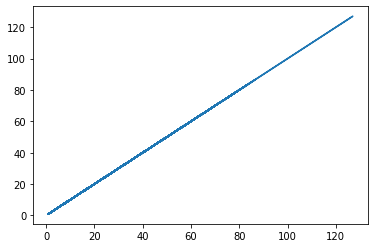

In [22]:
plt.plot(data.TEL_DISTANCE, data.CALC_DISTANCE)

In [23]:
data[['TEL_DISTANCE', 'CALC_DISTANCE']].corr()

,TEL_DISTANCE,CALC_DISTANCE
TEL_DISTANCE,1.0,1.0
CALC_DISTANCE,1.0,1.0


* Feature `TEL_DISTANCE` and `CALC_DISTANCE` are perfectly correlated so will keep only one.

In [24]:
data.drop('CALC_DISTANCE', axis=1, inplace=True)

In [25]:
data.TRIP_DISTANCE.max()

90.0

In [26]:
data[['TEL_DISTANCE', 'TRIP_DISTANCE']].describe()

,TEL_DISTANCE,TRIP_DISTANCE
count,11648.000000,16201.000000
mean,15.242445,13.346028
std,14.143275,13.003272
min,1.000000,1.000000
25%,5.000000,4.000000
50%,11.000000,9.000000
75%,21.000000,18.000000
max,127.000000,90.000000


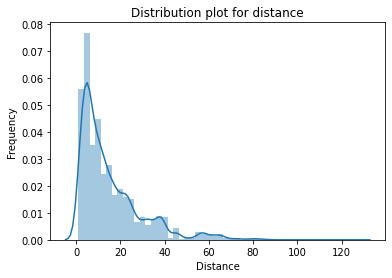

In [27]:
sns.distplot(data.TEL_DISTANCE)
plt.title("Distribution plot for distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:xlabel='TRIP_DISTANCE'>

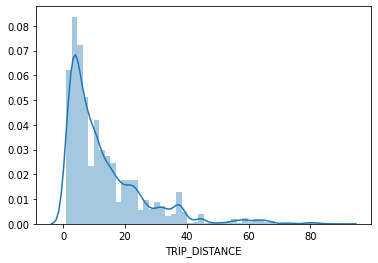

In [28]:
sns.distplot(data.TRIP_DISTANCE)

* Checking for relation between `TEL_DISTANCE` and `TRIP_DISTANCE`.

<AxesSubplot:xlabel='TEL_DISTANCE', ylabel='TRIP_DISTANCE'>

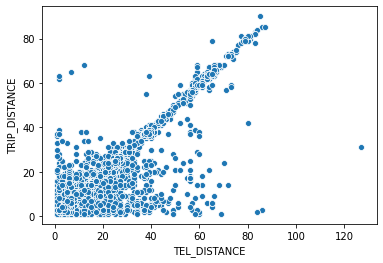

In [29]:
sns.scatterplot(data.TEL_DISTANCE, data.TRIP_DISTANCE)

In [30]:
data[['TEL_DISTANCE', 'TRIP_DISTANCE']].corr()

,TEL_DISTANCE,TRIP_DISTANCE
TEL_DISTANCE,1.000000,0.918032
TRIP_DISTANCE,0.918032,1.000000


In [31]:
data.loc[data.TRIP_DISTANCE == 90.0,]

,TEL_TRIPSTART,TEL_STARTODO,TEL_TRIPEND,TEL_ENDODO,TEL_SOC_START,TEL_SOC_END,TEL_AVG_VELOCITY,AC_ON_DURATION,AC_ON_PCT,HEADLAMP_ON_DURATION,HEADLAMP_ON_PCT,TRIPSTART_LOCN,TRIPEND_LOCN,CHARGE_TYPE,CONNECT_START,CHARGE_START,CONNECT_END,CHARGE_END,CHARGE_AMOUNT,FULLCHARGEFLAG,CHARGING_OCCURRENCES,UNACCOUNTED_KM,FULLCHARGE_KMSPAN,FULLCHARGE_EFFICIENCY,FULLCHARGE_AMOUNT,RECSTARTDATE,RECENDDATE,START_DATE,START_ODO_ACTUAL,START_BAT_EST,START_BAT_ACTUAL,END_DATE,END_ODO_EST,END_ODO_ACTUAL,END_BAT_EST,END_BAT_ACTUAL,TRIP_DISTANCE,TEL_DISTANCE,NO_PASSENGERS,ACCESSORIES,LOG_AVG_VELOCITY
10250,09:16.4,4268.0,25:08.5,4353.0,99.0,14.0,67.11,59.92,NaN,74.87,NaN,Other,Home,HOME,20:00.0,20:00.0,00:00.0,00:00.0,14181.0,1,1,7.0,92.0,154.141304,14181.0,01:06.0,25:13.0,01:06.0,4261.0,16.0,16.0,25:13.0,4351.0,-1.0,0.0,-1.0,90.0,85.0,NaN,NaN,64.29


* Dropping `TRIP_DISTANCE` as it have less variance while `TEL_DISTANCE` have more variance and can better explain the dofferent features.

In [32]:
data.drop('TRIP_DISTANCE', axis=1, inplace=True)

* Dropping all the variables that are generated after the trip end as these features can not be known when the trip starts and might cause data lekage.

In [33]:
listtoremove = ['TEL_ENDODO', 'TEL_SOC_END', 'END_ODO_EST', 'END_ODO_ACTUAL', 'END_BAT_EST', 'END_BAT_ACTUAL', 
                'START_BAT_ACTUAL', 'TEL_TRIPEND', 'RECSTARTDATE', 'RECENDDATE', 'START_DATE', 'END_DATE']

<AxesSubplot:xlabel='CHARGE_AMOUNT', ylabel='FULLCHARGE_AMOUNT'>

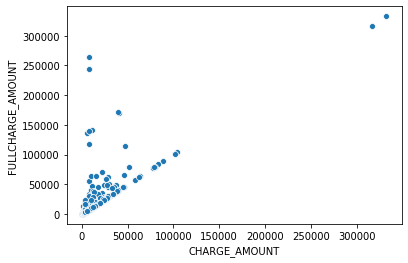

In [34]:
sns.scatterplot(data.CHARGE_AMOUNT, data.FULLCHARGE_AMOUNT)

In [35]:
data.drop(listtoremove,
          axis=1, 
          inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16201 entries, 2 to 26154
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TEL_TRIPSTART          11648 non-null  object 
 1   TEL_STARTODO           11648 non-null  float64
 2   TEL_SOC_START          11648 non-null  float64
 3   TEL_AVG_VELOCITY       11648 non-null  float64
 4   AC_ON_DURATION         11648 non-null  float64
 5   AC_ON_PCT              7128 non-null   float64
 6   HEADLAMP_ON_DURATION   11648 non-null  float64
 7   HEADLAMP_ON_PCT        7893 non-null   float64
 8   TRIPSTART_LOCN         16201 non-null  object 
 9   TRIPEND_LOCN           16201 non-null  object 
 10  CHARGE_TYPE            4426 non-null   object 
 11  CONNECT_START          4426 non-null   object 
 12  CHARGE_START           4426 non-null   object 
 13  CONNECT_END            4426 non-null   object 
 14  CHARGE_END             4426 non-null   object 
 15  CH

## 4.3 Encoding the non numerical features

* Finding all the unique accessories in the `ACCESSORIES` feature using `unique()` function.

In [36]:
data.ACCESSORIES.unique()

array(['[NONE]', 'Air Con', 'Headlights', nan, 'Headlights / Air Con',
       'Heating', 'Headlights / Heating', 'Air Con / Heating',
       'Headlights / Air Con / Heating'], dtype=object)

* The identified accessories are:
    * Air Con
    * Heating
    * Headlights

In [37]:
ACCESSORIESdf = pd.DataFrame({'AirCon': data.ACCESSORIES,
                  'Heating': data.ACCESSORIES,
                  'Headlights': data.ACCESSORIES})

In [38]:
ACCESSORIESdf.fillna('[NONE]', inplace=True)

In [39]:
for i in range(ACCESSORIESdf.shape[0]):
    if 'Air Con' in ACCESSORIESdf.AirCon.iloc[i]:
        ACCESSORIESdf.AirCon.iloc[i] = 1
    else:
        ACCESSORIESdf.AirCon.iloc[i] = 0

In [40]:
for i in range(ACCESSORIESdf.shape[0]):
    if 'Heating' in ACCESSORIESdf.Heating.iloc[i]:
        ACCESSORIESdf.Heating.iloc[i] = 1
    else:
        ACCESSORIESdf.Heating.iloc[i] = 0

In [41]:
for i in range(ACCESSORIESdf.shape[0]):
    if 'Headlights' in ACCESSORIESdf.Headlights.iloc[i]:
        ACCESSORIESdf.Headlights.iloc[i] = 1
    else:
        ACCESSORIESdf.Headlights.iloc[i] = 0

* Concatinating the encoded features with the main dataframe
* Dropping the `ACCESSORIES` column

In [42]:
data = pd.concat([data,ACCESSORIESdf], axis=1)
data.drop(['ACCESSORIES'], axis=1, inplace=True)

* Converting the final column into int type

In [43]:
data.Headlights = [int(i) for i in data.Headlights]
data.Heating = [int(i) for i in data.Heating]
data.AirCon = [int(i) for i in data.AirCon]

* Dropping `AC_ON_PCT` and `HEADLAMP_ON_PCT` as the feature is consist of 0 or missing values only.

In [44]:
data.HEADLAMP_ON_PCT.unique()

array([nan,  0.])

In [45]:
data.AC_ON_PCT.unique()

array([ 0., nan])

In [46]:
data.drop(['AC_ON_PCT', 'HEADLAMP_ON_PCT'], axis=1, inplace=True)

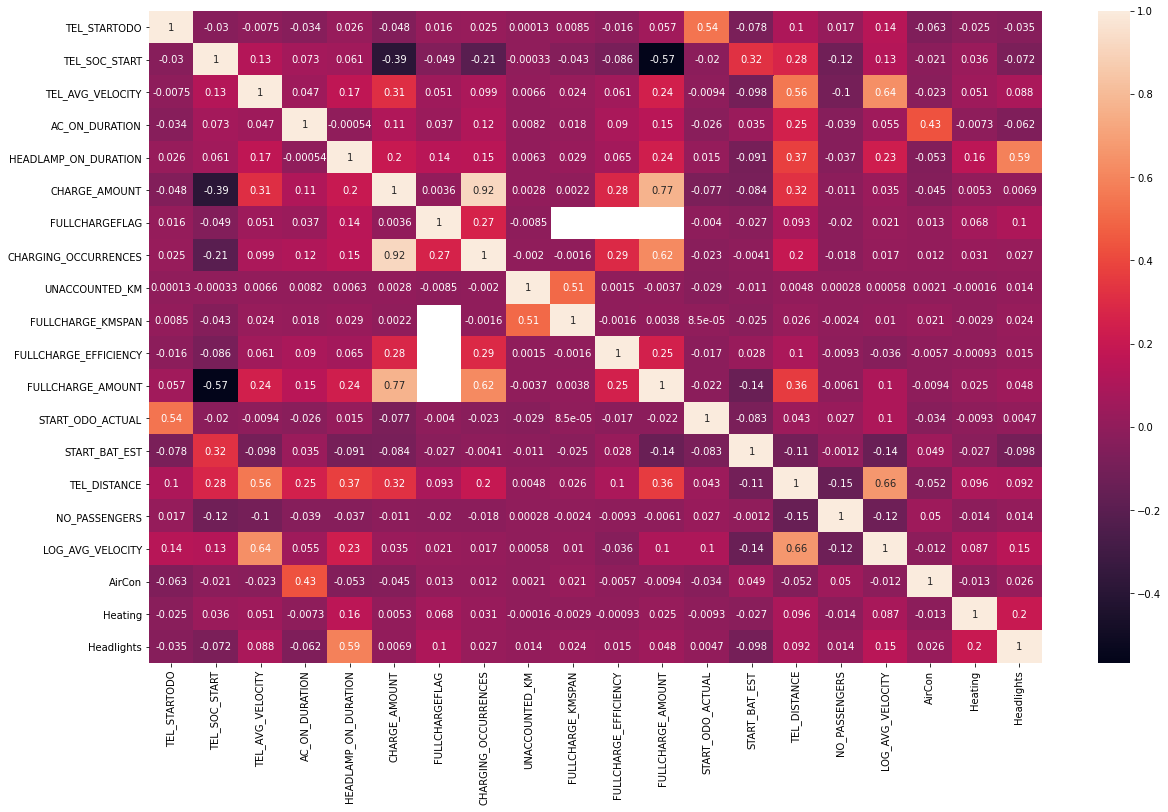

In [47]:
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.heatmap(
    data.corr(),
    annot=True
)
plt.show()

* `FULLCHARGEFLAG` tell uss weather the batter was fully charged or not.
* Missing data is assumed to be not full charged battery hence flag is set to 0.

In [48]:
data[['FULLCHARGEFLAG', 'TEL_TRIPSTART']].groupby('FULLCHARGEFLAG').count()

,TEL_TRIPSTART
FULLCHARGEFLAG,
0,7544
1,4104


In [49]:
data[['FULLCHARGE_KMSPAN', 'FULLCHARGE_EFFICIENCY', 'FULLCHARGE_AMOUNT']] = data[['FULLCHARGE_KMSPAN', 'FULLCHARGE_EFFICIENCY', 'FULLCHARGE_AMOUNT']].fillna(0)

* If battery is fully charged so iy will equal to `CHARGE_AMOUNT`.
* Replacing the missing data with the data in `FULLCHARGE_AMOUNT`.

In [50]:
data.loc[(data.FULLCHARGE_AMOUNT != 0) & 
         (data.CHARGE_AMOUNT.isna()) & 
         (data.FULLCHARGE_AMOUNT.isna()==False), ['CHARGE_AMOUNT','FULLCHARGE_AMOUNT']]

,CHARGE_AMOUNT,FULLCHARGE_AMOUNT
288,NaN,23922.0
903,NaN,2864.0
1839,NaN,41312.0
1950,NaN,414761.0
2031,NaN,6035.0
3006,NaN,3441.0
3901,NaN,17008.0
4845,NaN,8575.0
5383,NaN,359456.0
5414,NaN,39932.0


In [51]:
data.loc[(data.FULLCHARGE_AMOUNT != 0) &
         (data.CHARGE_AMOUNT.isna()) & 
         (data.FULLCHARGE_AMOUNT.isna()==False), 'CHARGE_AMOUNT'] = data.loc[(data.FULLCHARGE_AMOUNT != 0) & 
                                                                             (data.CHARGE_AMOUNT.isna()) & 
                                                                             (data.FULLCHARGE_AMOUNT.isna()==False), 
                                                                             'FULLCHARGE_AMOUNT']

In [52]:
data.dropna(subset=['CHARGE_END'], axis=0, inplace=True)
data.dropna(subset=['CHARGE_AMOUNT'], axis=0, inplace=True)
data.drop(['FULLCHARGE_AMOUNT'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4426 entries, 24 to 26154
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TEL_TRIPSTART          3292 non-null   object 
 1   TEL_STARTODO           3292 non-null   float64
 2   TEL_SOC_START          3292 non-null   float64
 3   TEL_AVG_VELOCITY       3292 non-null   float64
 4   AC_ON_DURATION         3292 non-null   float64
 5   HEADLAMP_ON_DURATION   3292 non-null   float64
 6   TRIPSTART_LOCN         4426 non-null   object 
 7   TRIPEND_LOCN           4426 non-null   object 
 8   CHARGE_TYPE            4426 non-null   object 
 9   CONNECT_START          4426 non-null   object 
 10  CHARGE_START           4426 non-null   object 
 11  CONNECT_END            4426 non-null   object 
 12  CHARGE_END             4426 non-null   object 
 13  CHARGE_AMOUNT          4426 non-null   float64
 14  FULLCHARGEFLAG         4426 non-null   int64  
 15  CH

In [53]:
data = pd.get_dummies(data, columns=['TRIPSTART_LOCN'])
data = pd.get_dummies(data, columns=['TRIPEND_LOCN'])
data = pd.get_dummies(data, columns=['CHARGE_TYPE'])

In [54]:
data.dropna(subset=['TEL_DISTANCE'], axis=0, inplace=True)

In [55]:
data.NO_PASSENGERS.fillna(0, inplace=True)

In [56]:
data.head()

,TEL_TRIPSTART,TEL_STARTODO,TEL_SOC_START,TEL_AVG_VELOCITY,AC_ON_DURATION,HEADLAMP_ON_DURATION,CONNECT_START,CHARGE_START,CONNECT_END,CHARGE_END,CHARGE_AMOUNT,FULLCHARGEFLAG,CHARGING_OCCURRENCES,UNACCOUNTED_KM,FULLCHARGE_KMSPAN,FULLCHARGE_EFFICIENCY,START_ODO_ACTUAL,START_BAT_EST,TEL_DISTANCE,NO_PASSENGERS,LOG_AVG_VELOCITY,AirCon,Heating,Headlights,TRIPSTART_LOCN_Home,TRIPSTART_LOCN_Other,TRIPSTART_LOCN_Work,TRIPEND_LOCN_Home,TRIPEND_LOCN_Other,TRIPEND_LOCN_Work,CHARGE_TYPE_BP Fast,CHARGE_TYPE_BP Standard,CHARGE_TYPE_HOME,CHARGE_TYPE_INLINE
28,59:55.0,16768.0,88.0,18.00,19.40,0.0,19:00.0,19:00.0,57:00.0,48:00.0,3381.0,1,1,0.0,16.0,211.312500,16768.0,15.0,6.0,0.0,15.79,0,0,0,0,1,0,0,1,0,0,1,0,0
33,03:15.9,12393.0,69.0,55.14,36.83,0.0,30:00.0,30:00.0,10:00.0,10:00.0,4129.0,0,1,0.0,0.0,0.000000,12393.0,11.0,34.0,1.0,58.29,1,0,0,0,0,1,1,0,0,0,0,1,0
34,37:18.2,14079.0,102.0,32.90,31.10,0.0,50:00.0,50:00.0,20:00.0,20:00.0,3937.0,0,1,0.0,0.0,0.000000,14025.0,15.0,17.0,1.0,32.00,1,0,0,0,0,1,1,0,0,0,0,0,1
38,28:29.4,25699.0,78.0,43.93,0.00,0.0,10:00.0,10:00.0,40:00.0,10:00.0,10712.0,1,1,0.0,75.0,142.826667,25735.0,5.0,41.0,1.0,30.00,0,0,0,0,0,1,1,0,0,0,0,1,0
45,08:17.0,12427.0,60.0,50.27,19.00,0.0,30:00.0,30:00.0,10:00.0,00:00.0,4765.0,0,1,0.0,0.0,0.000000,12427.0,4.0,31.0,1.0,51.43,1,0,0,1,0,0,0,1,0,0,0,0,1


In [57]:
data.describe()

,TEL_STARTODO,TEL_SOC_START,TEL_AVG_VELOCITY,AC_ON_DURATION,HEADLAMP_ON_DURATION,CHARGE_AMOUNT,FULLCHARGEFLAG,CHARGING_OCCURRENCES,UNACCOUNTED_KM,FULLCHARGE_KMSPAN,FULLCHARGE_EFFICIENCY,START_ODO_ACTUAL,START_BAT_EST,TEL_DISTANCE,NO_PASSENGERS,LOG_AVG_VELOCITY,AirCon,Heating,Headlights,TRIPSTART_LOCN_Home,TRIPSTART_LOCN_Other,TRIPSTART_LOCN_Work,TRIPEND_LOCN_Home,TRIPEND_LOCN_Other,TRIPEND_LOCN_Work,CHARGE_TYPE_BP Fast,CHARGE_TYPE_BP Standard,CHARGE_TYPE_HOME,CHARGE_TYPE_INLINE
count,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000
mean,14392.212333,71.564702,35.069271,8.923484,10.310216,7989.762454,0.878190,1.130620,0.095687,44.100851,189.344177,14692.940158,9.770352,19.699575,1.169198,35.518703,0.286756,0.085662,0.318651,0.151580,0.644289,0.204131,0.616646,0.124848,0.258505,0.005772,0.390036,0.569563,0.034629
std,6901.363945,21.904139,16.663146,15.112030,16.841208,4250.105170,0.327116,0.403507,4.349054,32.276299,239.086119,11743.060831,4.121314,17.230663,0.850538,16.133056,0.452315,0.279907,0.466024,0.358667,0.478801,0.403127,0.486277,0.330597,0.437880,0.075763,0.487832,0.495213,0.182867
min,809.000000,13.000000,0.000000,0.000000,0.000000,221.000000,0.000000,1.000000,-82.000000,-3.000000,0.000000,0.000000,-2.000000,1.000000,0.000000,0.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9017.500000,57.000000,24.000000,0.000000,0.000000,4858.000000,1.000000,1.000000,0.000000,21.000000,147.121584,8898.250000,7.000000,7.000000,1.000000,24.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13938.000000,73.000000,32.310000,0.000000,0.000000,7664.000000,1.000000,1.000000,0.000000,42.000000,172.370565,13884.000000,10.000000,13.000000,1.000000,33.330000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,18466.500000,89.000000,42.762500,13.250000,14.972500,10746.000000,1.000000,1.000000,0.000000,65.000000,202.991958,18502.750000,13.000000,28.000000,1.000000,43.640000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,32563.000000,109.000000,300.000000,101.900000,101.890000,39752.000000,1.000000,6.000000,59.000000,605.000000,8952.000000,292281.000000,16.000000,87.000000,4.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3292 entries, 28 to 26127
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TEL_TRIPSTART            3292 non-null   object 
 1   TEL_STARTODO             3292 non-null   float64
 2   TEL_SOC_START            3292 non-null   float64
 3   TEL_AVG_VELOCITY         3292 non-null   float64
 4   AC_ON_DURATION           3292 non-null   float64
 5   HEADLAMP_ON_DURATION     3292 non-null   float64
 6   CONNECT_START            3292 non-null   object 
 7   CHARGE_START             3292 non-null   object 
 8   CONNECT_END              3292 non-null   object 
 9   CHARGE_END               3292 non-null   object 
 10  CHARGE_AMOUNT            3292 non-null   float64
 11  FULLCHARGEFLAG           3292 non-null   int64  
 12  CHARGING_OCCURRENCES     3292 non-null   int64  
 13  UNACCOUNTED_KM           3292 non-null   float64
 14  FULLCHARGE_KMSPAN     

In [59]:
featurelist=list(data.columns)
featurelist.remove('CONNECT_START')
featurelist.remove('CHARGE_START')
featurelist.remove('CONNECT_END')
featurelist.remove('CHARGE_END')
featurelist.remove('TEL_TRIPSTART')
featurelist.remove('CHARGE_AMOUNT')
featurelist.remove('UNACCOUNTED_KM')

In [60]:
ols = sm.OLS(data.CHARGE_AMOUNT, data[featurelist])
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CHARGE_AMOUNT   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     387.9
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:13:15   Log-Likelihood:                -29956.
No. Observations:                3292   AIC:                         5.996e+04
Df Residuals:                    3267   BIC:                         6.011e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
TEL_STARTODO               -0.0294      0.007     -3.989      0.000      -0.044      -0.015
TEL_SOC_START            -113.4174      3.200    -35.447      0.000    -119.691    -107.144
TEL_AVG_VELOCITY            5.9805      4.287      1.395      0.163      -2.426      14.387
AC_ON_DURATION             23.9197      3.161      7.567      0.000      17.722      30.118
HEADLAMP_ON_DURATION        4.7720      3.232      1.476      0.140      -1.566      11.110
FULLCHARGEFLAG           2530.6548    169.741     14.909      0.000    2197.845    2863.464
CHARGING_OCCURRENCES     2640.1229     99.266     26.597      0.000    2445.494    2834.752
FULLCHARGE_KMSPAN          19.6592      1.988      9.891      0.000      15.762      23.556
FULLCHARGE_EFFICIENCY       2.8168      0.177     15.958      0.000       2.471       3.163
START_ODO_ACTUAL           -0.0007      0.004     -0.164      0.870      -0.009       0.008
START_BAT_EST             -99.2721     12.670     -7.835      0.000    -124.114     -74.430
TEL_DISTANCE              116.8295      4.811     24.286      0.000     107.398     126.262
NO_PASSENGERS               0.9075     49.381      0.018      0.985     -95.913      97.728
LOG_AVG_VELOCITY           14.7106      4.673      3.148      0.002       5.548      23.873
AirCon                   -308.6856    100.803     -3.062      0.002    -506.329    -111.043
Heating                   222.7794    141.642      1.573      0.116     -54.936     500.495
Headlights                255.9681    108.865      2.351      0.019      42.517     469.420
TRIPSTART_LOCN_Home      3064.0468    139.989     21.888      0.000    2789.572    3338.521
TRIPSTART_LOCN_Other     3159.5092    118.076     26.758      0.000    2927.999    3391.019
TRIPSTART_LOCN_Work      2856.8126    135.503     21.083      0.000    2591.134    3122.492
TRIPEND_LOCN_Home        3395.0781    160.836     21.109      0.000    3079.729    3710.427
TRIPEND_LOCN_Other       2386.8095    159.425     14.971      0.000    2074.227    2699.392
TRIPEND_LOCN_Work        3298.4811    156.923     21.020      0.000    2990.804    3606.158
CHARGE_TYPE_BP Fast      3842.9396    421.686      9.113      0.000    3016.144    4669.735
CHARGE_TYPE_BP Standard  1223.6378    162.400      7.535      0.000     905.221    1542.055
CHARGE_TYPE_HOME         1172.1261    175.971      6.661      0.000     827.102    1517.150
CHARGE_TYPE_INLINE       2841.6652    205.869     13.803      0.000    2438.020    3245.310
==============================================================================
Omnibus:                     1084.103   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24545.086
Skew:                           1.026   Prob(JB):                         0.00
Kurtosi

In [61]:
featurelist.remove('HEADLAMP_ON_DURATION')
featurelist.remove('FULLCHARGEFLAG')
featurelist.remove('TEL_AVG_VELOCITY')
featurelist.remove('NO_PASSENGERS')
featurelist.remove('Heating')
featurelist.remove('START_ODO_ACTUAL')
featurelist.remove('START_BAT_EST')
featurelist.remove('CHARGE_TYPE_HOME')
featurelist.remove('CHARGE_TYPE_BP Standard')
featurelist.remove('TRIPSTART_LOCN_Other')
featurelist.remove('TRIPEND_LOCN_Home')
featurelist.remove('AirCon')
ols = sm.OLS(data.CHARGE_AMOUNT, data[featurelist])
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          CHARGE_AMOUNT   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              2587.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):                        0.00
Time:                        15:13:15   Log-Likelihood:                         -30461.
No. Observations:                3292   AIC:                                  6.095e+04
Df Residuals:                    3277   BIC:                                  6.104e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
TEL_STARTODO              0.0335      0.006      5.445      0.000       0.021       0.045
TEL_SOC_START           -56.4706      2.157    -26.177      0.000     -60.700     -52.241
AC_ON_DURATION           24.3195      3.131      7.766      0.000      18.180      30.459
CHARGING_OCCURRENCES   3924.9141    103.895     37.778      0.000    3721.209    4128.619
FULLCHARGE_KMSPAN        60.8107      1.499     40.577      0.000      57.872      63.749
FULLCHARGE_EFFICIENCY     3.9895      0.190     20.955      0.000       3.616       4.363
TEL_DISTANCE             53.0916      4.081     13.011      0.000      45.091      61.092
LOG_AVG_VELOCITY         57.8769      3.787     15.281      0.000      50.451      65.303
Headlights              741.9300     99.235      7.477      0.000     547.362     936.498
TRIPSTART_LOCN_Home     151.4163    140.885      1.075      0.283    -124.816     427.648
TRIPSTART_LOCN_Work    -243.8748    123.953     -1.967      0.049    -486.908      -0.841
TRIPEND_LOCN_Other     -941.6815    148.884     -6.325      0.000   -1233.597    -649.766
TRIPEND_LOCN_Work        76.0478    119.409      0.637      0.524    -158.076     310.172
CHARGE_TYPE_BP Fast    2310.1076    587.691      3.931      0.000    1157.829    3462.386
CHARGE_TYPE_INLINE     1829.5524    246.383      7.426      0.000    1346.472    2312.633
==============================================================================
Omnibus:                      831.079   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26097.675
Skew:                          -0.538   Prob(JB):                         0.00
Kurtosis:                      16.752   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
sns.pairplot(data)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-62-9f33636b51d6>", line 1, in <module>
    sns.pairplot(data)
  File "/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/seaborn/axisgrid.py", line 2123, in pairplot
    plotter(scatterplot, **plot_kws)
  File "/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/seaborn/axisgrid.py", line 1402, in map_offdiag
    self.map_lower(func, **kwargs)
  File "/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/seaborn/axisgrid.py", line 1372, in map_lower
    self._map_bivariate(func, indices, **kwargs)
  File "/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/seaborn/axisgrid.py", line 1498, in _map_bivariate
    self._plot_bivariate(x_var, y_var, ax, func

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x7fc293ce7670> (for post_execute):


KeyboardInterrupt: 

ERROR! Session/line number was not unique in database. History logging moved to new session 185


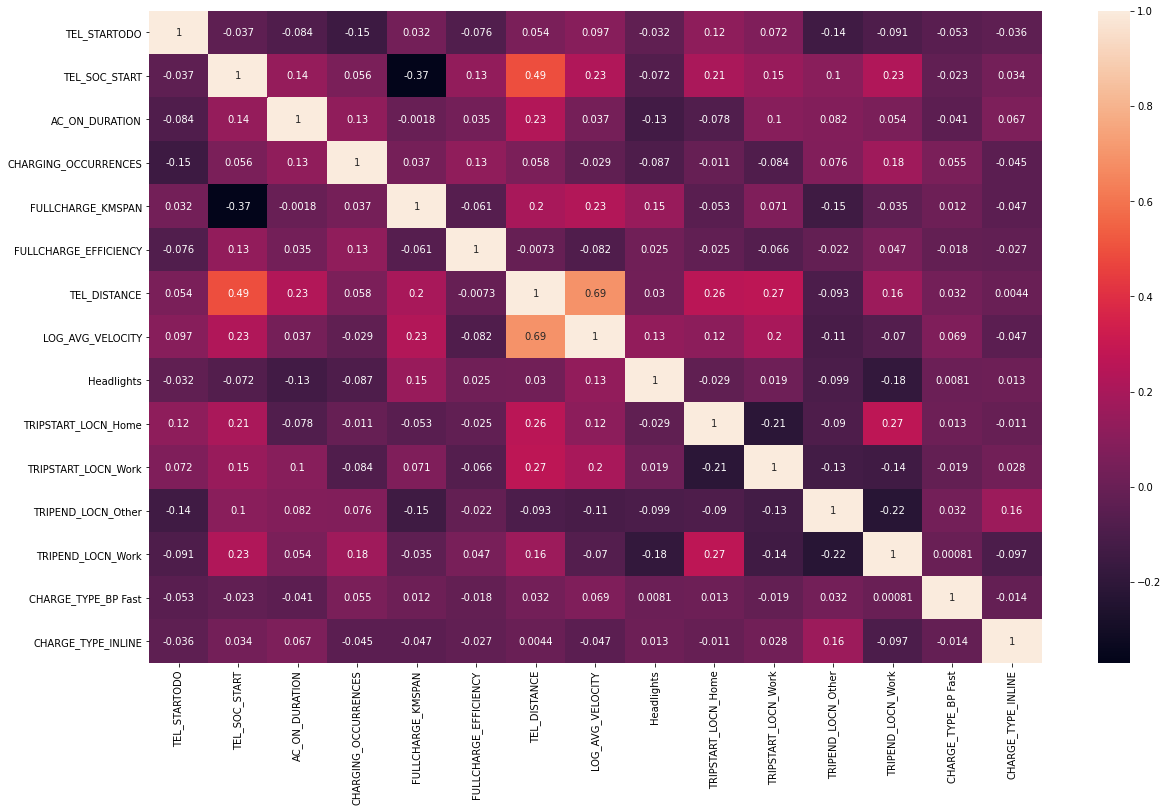

In [62]:
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.heatmap(
    data[featurelist].corr(),
    annot=True
)
plt.show()

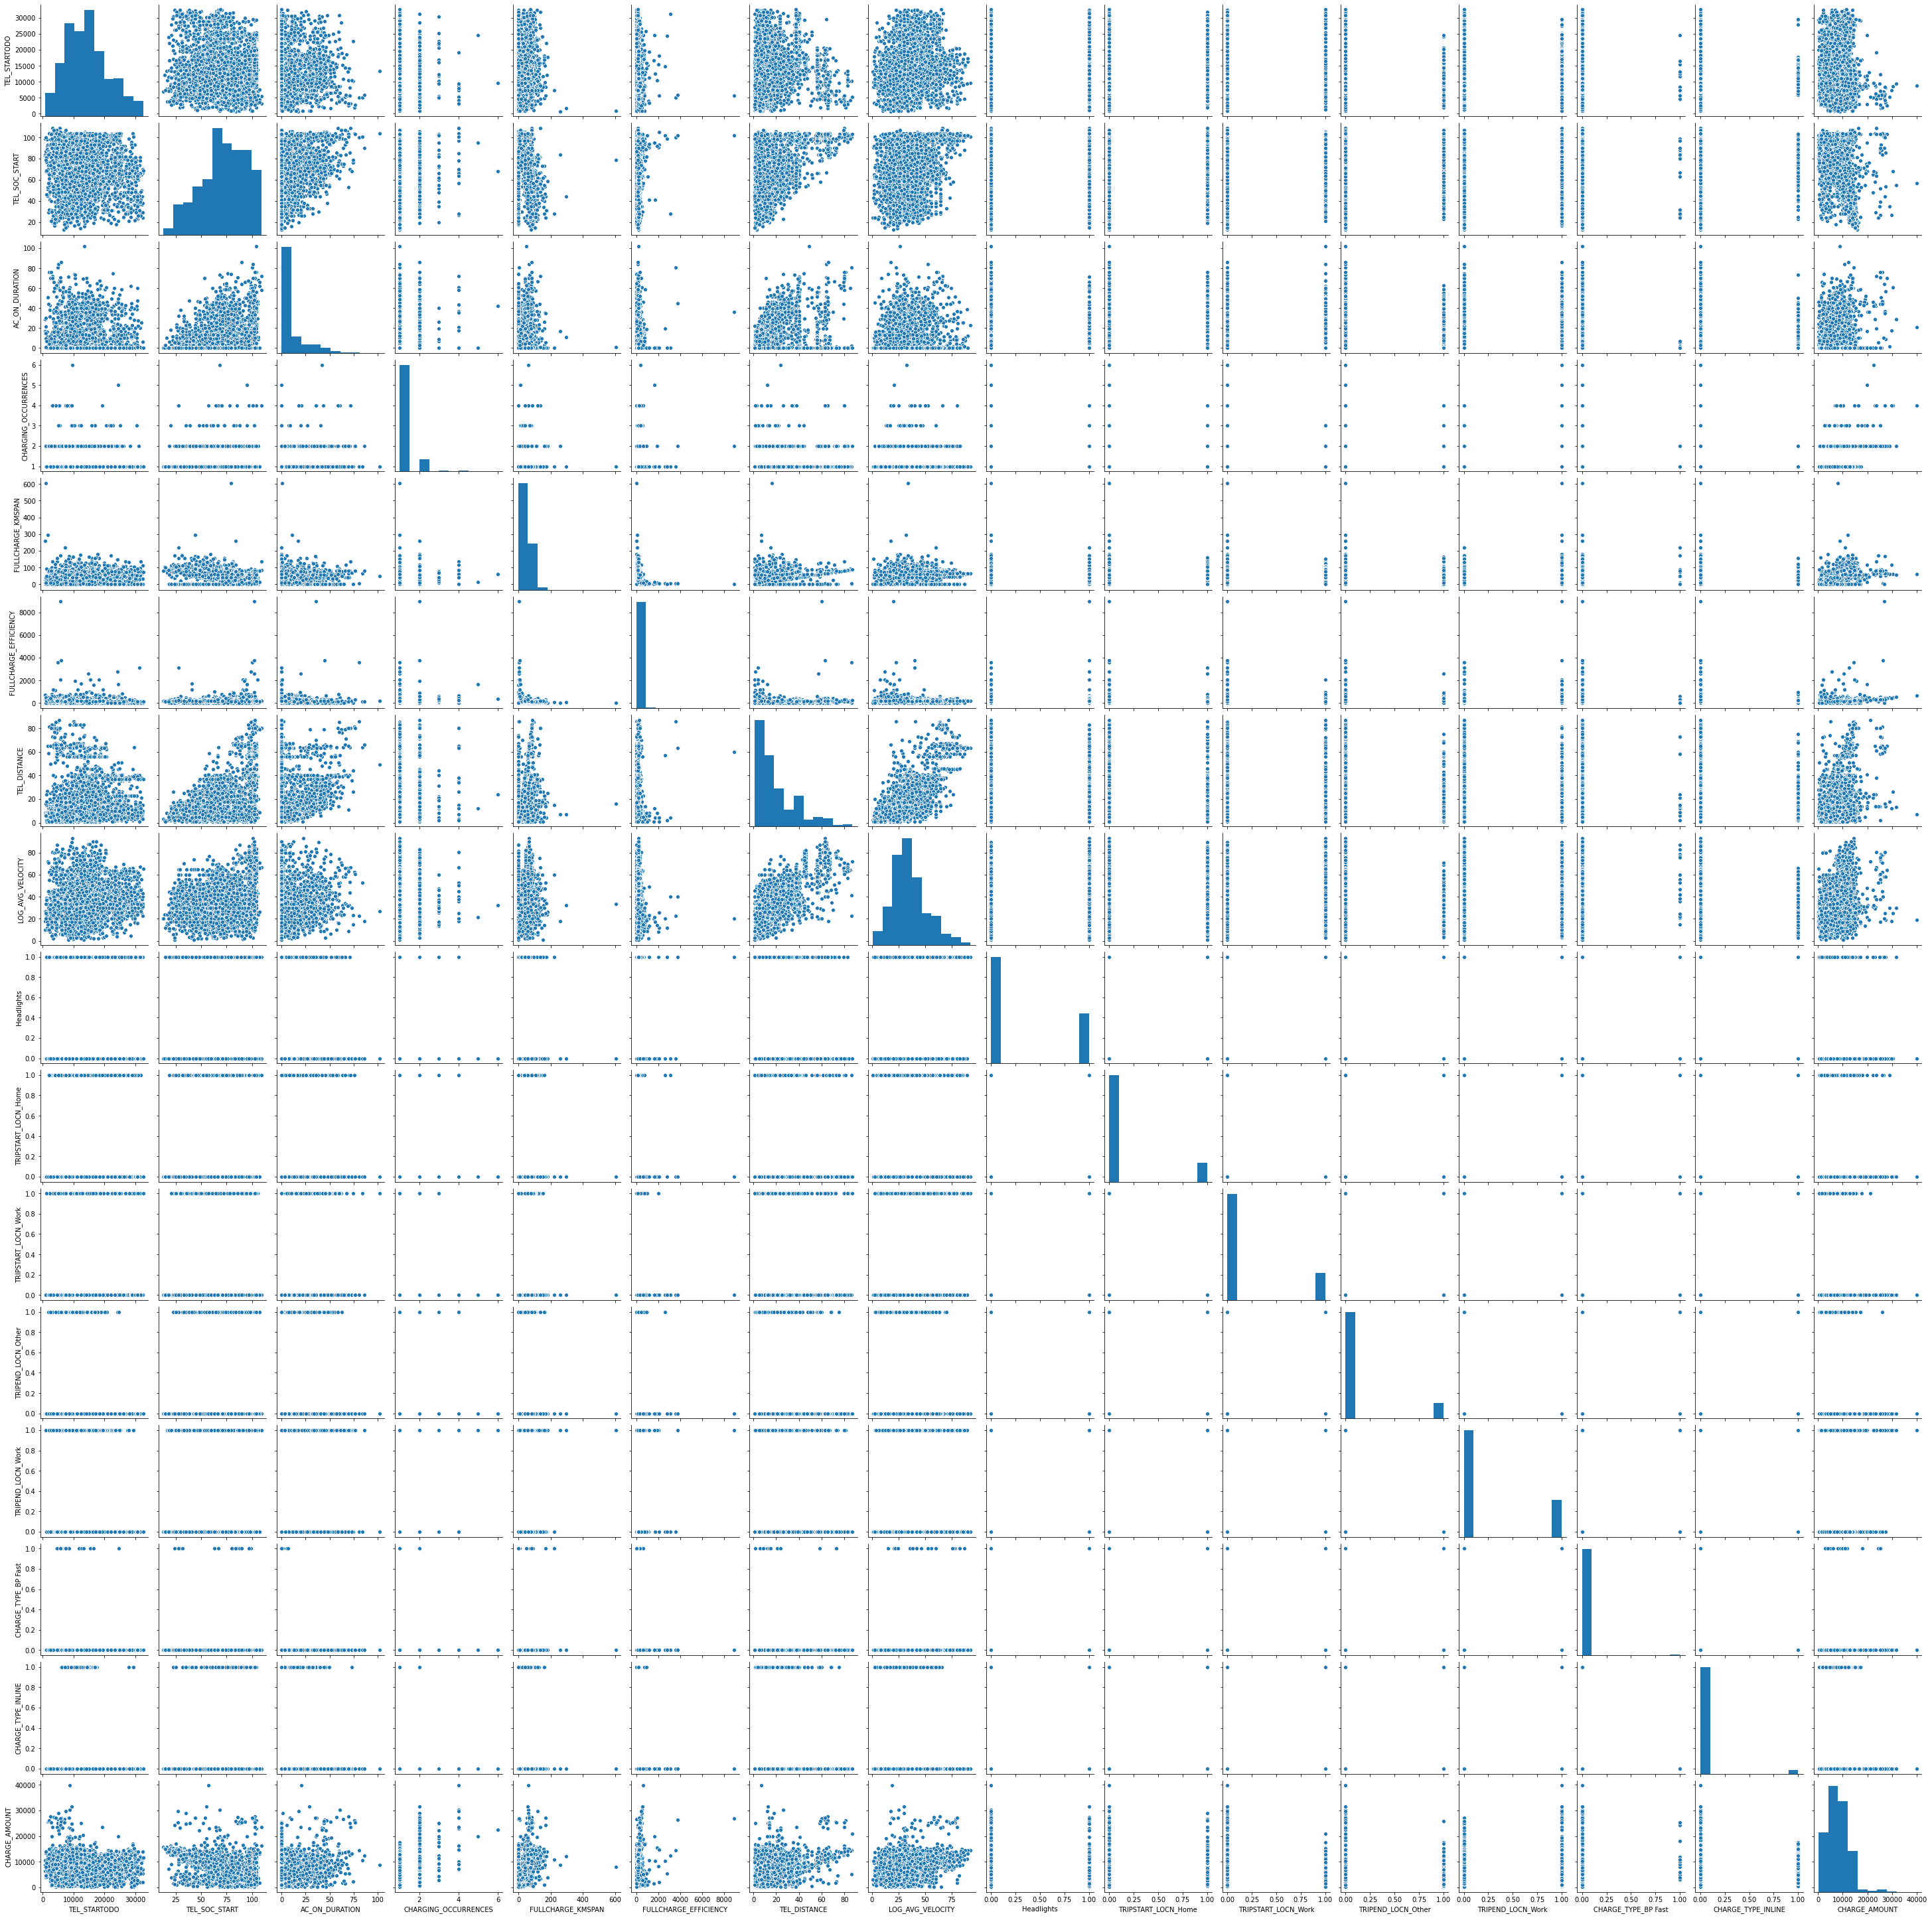

In [192]:
featurelistnew = featurelist
featurelistnew.append('CHARGE_AMOUNT')
sns.pairplot(data[featurelistnew])

In [64]:
y = data.CHARGE_AMOUNT
X = data[featurelist]

In [202]:
X.columns

Index(['TEL_STARTODO', 'TEL_SOC_START', 'AC_ON_DURATION',
       'CHARGING_OCCURRENCES', 'FULLCHARGE_KMSPAN', 'FULLCHARGE_EFFICIENCY',
       'TEL_DISTANCE', 'LOG_AVG_VELOCITY', 'Headlights', 'TRIPSTART_LOCN_Home',
       'TRIPSTART_LOCN_Work', 'TRIPEND_LOCN_Other', 'TRIPEND_LOCN_Work',
       'CHARGE_TYPE_BP Fast', 'CHARGE_TYPE_INLINE'],
      dtype='object')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

In [66]:
featurescaler = MinMaxScaler()
targetscaler = MinMaxScaler()

In [67]:
featurescaler.fit(X_train)
targetscaler.fit(y_train.values.reshape(-1,1))

MinMaxScaler()

In [68]:
X_train = featurescaler.transform(X_train)
X_test = featurescaler.transform(X_test)

In [69]:
y_train = targetscaler.transform(y_train.values.reshape(-1,1))
y_test = targetscaler.transform(y_test.values.reshape(-1,1))

# Ridge Regression

In [70]:
ridge = linear_model.Ridge(random_state=0)

In [71]:
param_grid = {'alpha': np.array([1,0.1,0.01,0.001,0.0001,0]),
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
              'max_iter': np.arange(1,1000),
             'normalize': [True, False]}

In [72]:
rsc = RandomizedSearchCV(estimator=ridge, param_distributions=param_grid, cv=10, verbose=20, random_state=0, 
                         scoring='r2')

In [73]:
grid_result = rsc.fit(X_test, y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001 ....
[CV]  solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001, score=0.776, total=   0.0s
[CV] solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001 ....
[CV]  solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001, score=0.728, total=   0.0s
[CV] solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001 ....
[CV]  solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001, score=0.734, total=   0.0s
[CV] solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001 ....
[CV]  solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001, score=0.892, total=   0.0s
[CV] solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001 ....
[CV]  solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001, score=0.444, total=   0.0s
[CV] solver=sparse_cg, normalize=True, max_iter=881, alpha=0.0001 ....
[CV]  solver=sparse_cg, normalize=Tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

[CV]  solver=saga, normalize=False, max_iter=115, alpha=0.001, score=0.664, total=   0.0s
[CV] solver=saga, normalize=False, max_iter=115, alpha=0.001 .........
[CV]  solver=saga, normalize=False, max_iter=115, alpha=0.001, score=0.781, total=   0.0s
[CV] solver=saga, normalize=False, max_iter=115, alpha=0.001 .........
[CV]  solver=saga, normalize=False, max_iter=115, alpha=0.001, score=0.781, total=   0.0s
[CV] solver=saga, normalize=False, max_iter=115, alpha=0.001 .........
[CV]  solver=saga, normalize=False, max_iter=115, alpha=0.001, score=0.795, total=   0.0s
[CV] solver=sparse_cg, normalize=False, max_iter=47, alpha=0.001 .....
[CV]  solver=sparse_cg, normalize=False, max_iter=47, alpha=0.001, score=0.775, total=   0.0s
[CV] solver=sparse_cg, normalize=False, max_iter=47, alpha=0.001 .....
[CV]  solver=sparse_cg, normalize=False, max_iter=47, alpha=0.001, score=0.728, total=   0.0s
[CV] solver=sparse_cg, normalize=False, max_iter=47, alpha=0.001 .....
[CV]  solver=sparse_cg, no

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s remaining:    0.0s


[CV]  solver=saga, normalize=False, max_iter=281, alpha=0.001, score=0.063, total=   0.0s
[CV] solver=saga, normalize=False, max_iter=281, alpha=0.001 .........
[CV]  solver=saga, normalize=False, max_iter=281, alpha=0.001, score=0.664, total=   0.0s
[CV] solver=saga, normalize=False, max_iter=281, alpha=0.001 .........
[CV]  solver=saga, normalize=False, max_iter=281, alpha=0.001, score=0.781, total=   0.0s
[CV] solver=saga, normalize=False, max_iter=281, alpha=0.001 .........
[CV]  solver=saga, normalize=False, max_iter=281, alpha=0.001, score=0.781, total=   0.0s
[CV] solver=saga, normalize=False, max_iter=281, alpha=0.001 .........
[CV]  solver=saga, normalize=False, max_iter=281, alpha=0.001, score=0.795, total=   0.0s
[CV] solver=sag, normalize=True, max_iter=519, alpha=0.1 .............
[CV]  solver=sag, normalize=True, max_iter=519, alpha=0.1, score=0.780, total=   0.0s
[CV] solver=sag, normalize=True, max_iter=519, alpha=0.1 .............
[CV]  solver=sag, normalize=True, max_

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [74]:
grid_result.best_estimator_

Ridge(alpha=0.1, max_iter=519, normalize=True, random_state=0, solver='sag')

In [75]:
grid_result.best_score_

0.6849490046631133

In [76]:
reghp = linear_model.Ridge(alpha=0.1, max_iter=519, normalize=True, random_state=0, solver='sag')
reghp.fit(X_test, y_test)
y_pred = reghp.predict(X_test)

In [77]:
r2_score(y_test, y_pred)

0.7520271980982824

In [78]:
print("Scaled mean_absolute_error = " + str(mean_absolute_error(y_test, y_pred)))
print("UnScaled mean_absolute_error = " + str(mean_absolute_error(targetscaler.inverse_transform(y_test), 
                                                                targetscaler.inverse_transform(y_pred))))

Scaled mean_absolute_error = 0.03392856562619603
UnScaled mean_absolute_error = 1341.2301277691552


In [79]:
print("Scaled mean_squared_error = " + str(mean_squared_error(y_test, y_pred)))
print("UnScaled mean_squared_error = " + str(mean_squared_error(targetscaler.inverse_transform(y_test), 
                                                                targetscaler.inverse_transform(y_pred))))

Scaled mean_squared_error = 0.0028939286927447756
UnScaled mean_squared_error = 4522342.255289042


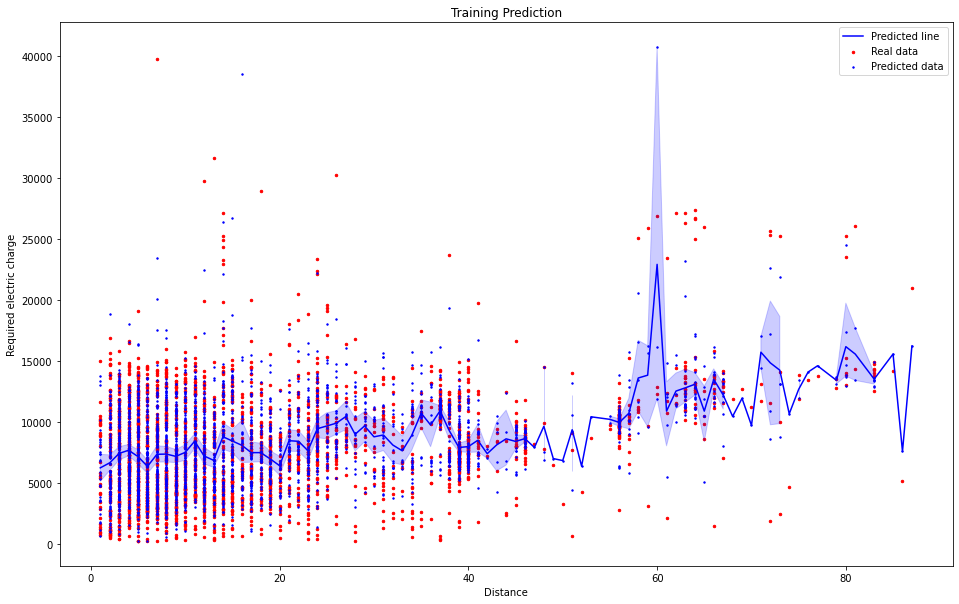

In [80]:
plt.figure(figsize=(16,10))
plt.scatter(featurescaler.inverse_transform(X_train)[:, 6], targetscaler.inverse_transform(y_train), color = 'red', label = 'Real data', s=6)
plt.scatter(featurescaler.inverse_transform(X_train)[:, 6], targetscaler.inverse_transform(reghp.predict(X_train)), color = 'blue', label = 'Predicted data', s=2)
sns.lineplot(featurescaler.inverse_transform(X_train)[:, 6], targetscaler.inverse_transform(reghp.predict(X_train)).reshape(1,-1)[0], color = 'blue', label = 'Predicted line')
plt.xlabel("Distance")
plt.ylabel("Required electric charge")
plt.title('Training Prediction')
plt.legend()
plt.show()

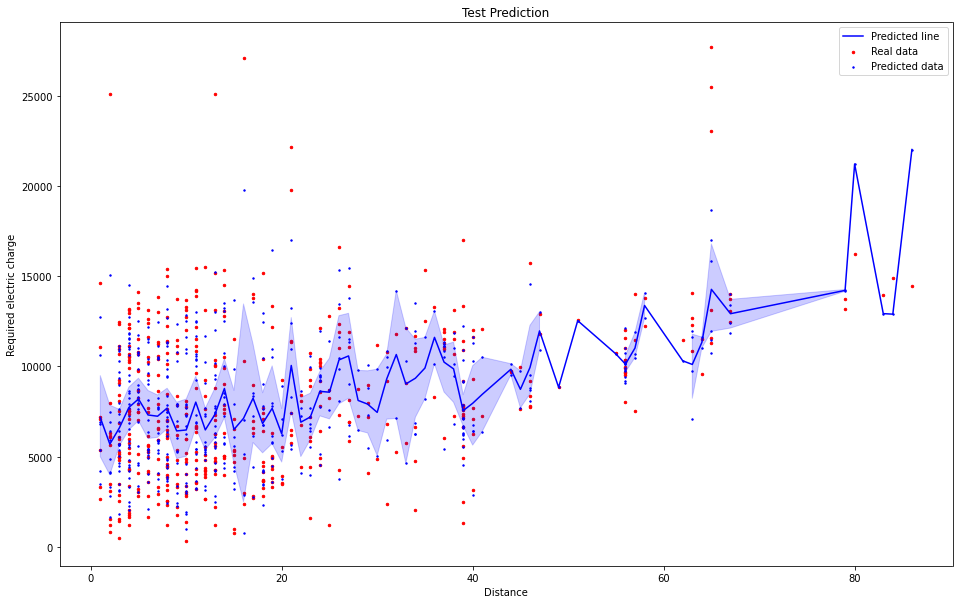

In [81]:
plt.figure(figsize=(16,10))
plt.scatter(featurescaler.inverse_transform(X_test)[:, 6], targetscaler.inverse_transform(y_test), color = 'red', label = 'Real data', s=6)
plt.scatter(featurescaler.inverse_transform(X_test)[:, 6], targetscaler.inverse_transform(y_pred), color = 'blue', label = 'Predicted data', s=2)
sns.lineplot(featurescaler.inverse_transform(X_test)[:, 6], targetscaler.inverse_transform(y_pred).reshape(1,-1)[0], color = 'blue', label = 'Predicted line')
plt.xlabel("Distance")
plt.ylabel("Required electric charge")
plt.title('Test Prediction')
plt.legend()
plt.show()

In [100]:
grid_result.cv_results_['split0_test_score']

array([0.77566069, 0.77445339, 0.77540636, 0.77445339, 0.7802518 ,
       0.77540648, 0.77671146, 0.77471705, 0.77563458, 0.77671146])

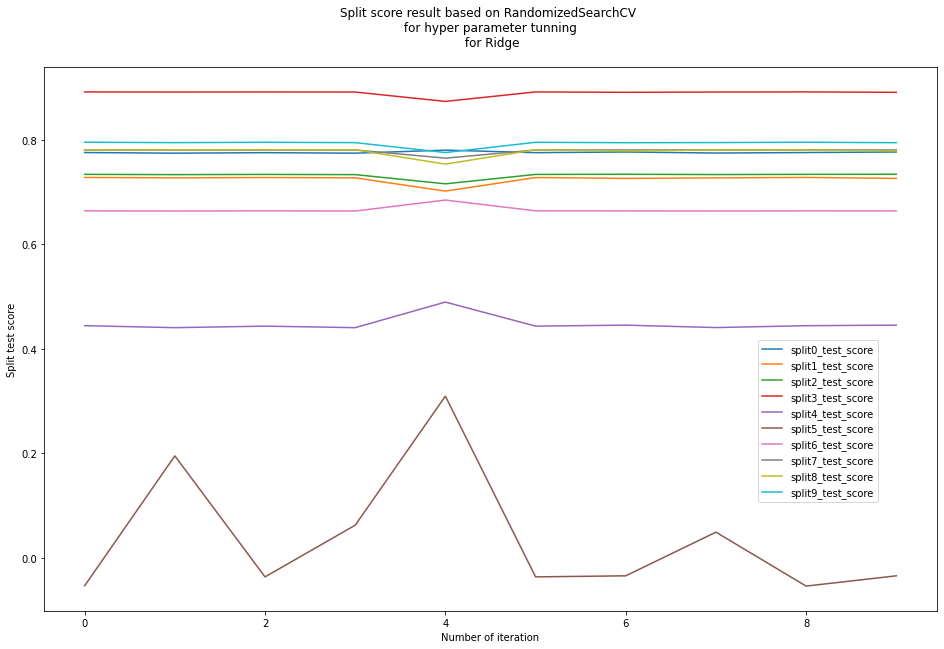

In [173]:
plt.figure(figsize=(16,10))
sns.lineplot(np.arange(0,10), grid_result.cv_results_['split0_test_score'], label='split0_test_score')
sns.lineplot(np.arange(0,10), grid_result.cv_results_['split1_test_score'], label='split1_test_score')
sns.lineplot(np.arange(0,10), grid_result.cv_results_['split2_test_score'], label='split2_test_score')
sns.lineplot(np.arange(0,10), grid_result.cv_results_['split3_test_score'], label='split3_test_score')
sns.lineplot(np.arange(0,10), grid_result.cv_results_['split4_test_score'], label='split4_test_score')
sns.lineplot(np.arange(0,10), grid_result.cv_results_['split5_test_score'], label='split5_test_score')
sns.lineplot(np.arange(0,10), grid_result.cv_results_['split6_test_score'], label='split6_test_score')
sns.lineplot(np.arange(0,10), grid_result.cv_results_['split7_test_score'], label='split7_test_score')
sns.lineplot(np.arange(0,10), grid_result.cv_results_['split8_test_score'], label='split8_test_score')
sns.lineplot(np.arange(0,10), grid_result.cv_results_['split9_test_score'], label='split9_test_score')
plt.xlabel('Number of iteration')
plt.ylabel('Split test score')
plt.legend(loc=[0.8,0.2])
plt.title("Split score result based on RandomizedSearchCV \n for hyper parameter tunning \n for Ridge\n")
plt.show()

# SVR

In [146]:
np.random.seed(0)
svr = SVR()

In [147]:
param_grid_svr = {'kernel': ('linear', 'rbf','poly'), 
                  'C':[1.5, 10],
                  'gamma': [1e-7, 1e-4],
                  'epsilon':[0.1,0.2,0.5,0.3]}

In [148]:
svr_rsc = RandomizedSearchCV(estimator=svr, param_distributions=param_grid_svr, cv=10, verbose=20, random_state=0)

In [149]:
svr_grid_result = svr_rsc.fit(X_test, y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] kernel=poly, gamma=0.0001, epsilon=0.1, C=10 ....................
[CV]  kernel=poly, gamma=0.0001, epsilon=0.1, C=10, score=-0.017, total=   0.0s
[CV] kernel=poly, gamma=0.0001, epsilon=0.1, C=10 ....................
[CV]  kernel=poly, gamma=0.0001, epsilon=0.1, C=10, score=-0.001, total=   0.0s
[CV] kernel=poly, gamma=0.0001, epsilon=0.1, C=10 ....................
[CV]  kernel=poly, gamma=0.0001, epsilon=0.1, C=10, score=-0.002, total=   0.0s
[CV] kernel=poly, gamma=0.0001, epsilon=0.1, C=10 ....................
[CV]  kernel=poly, gamma=0.0001, epsilon=0.1, C=10, score=-0.001, total=   0.0s
[CV] kernel=poly, gamma=0.0001, epsilon=0.1, C=10 ....................
[CV]  kernel=poly, gamma=0.0001, epsilon=0.1, C=10, score=-0.002, total=   0.0s
[CV] kernel=poly, gamma=0.0001, epsilon=0.1, C=10 ....................
[CV]  kernel=poly, gamma=0.0001, epsilon=0.1, C=10, score=-0.104, total=   0.0s
[CV] kernel=poly, gamma=0.0001,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[CV]  kernel=linear, gamma=1e-07, epsilon=0.2, C=10, score=0.511, total=   0.0s
[CV] kernel=linear, gamma=1e-07, epsilon=0.2, C=10 ...................
[CV]  kernel=linear, gamma=1e-07, epsilon=0.2, C=10, score=0.161, total=   0.0s
[CV] kernel=linear, gamma=1e-07, epsilon=0.2, C=10 ...................
[CV]  kernel=linear, gamma=1e-07, epsilon=0.2, C=10, score=0.232, total=   0.0s
[CV] kernel=linear, gamma=1e-07, epsilon=0.2, C=10 ...................
[CV]  kernel=linear, gamma=1e-07, epsilon=0.2, C=10, score=0.211, total=   0.0s
[CV] kernel=linear, gamma=1e-07, epsilon=0.2, C=10 ...................
[CV]  kernel=linear, gamma=1e-07, epsilon=0.2, C=10, score=0.376, total=   0.0s
[CV] kernel=linear, gamma=1e-07, epsilon=0.2, C=10 ...................
[CV]  kernel=linear, gamma=1e-07, epsilon=0.2, C=10, score=0.261, total=   0.0s
[CV] kernel=linear, gamma=1e-07, epsilon=0.2, C=10 ...................
[CV]  kernel=linear, gamma=1e-07, epsilon=0.2, C=10, score=0.503, total=   0.0s
[CV] kernel=po

/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was 


[CV] kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5 .....................
[CV]  kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5, score=-0.035, total=   0.0s
[CV] kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5 .....................
[CV]  kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5, score=-0.000, total=   0.0s
[CV] kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5 .....................
[CV]  kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5, score=-0.164, total=   0.0s
[CV] kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5 .....................
[CV]  kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5, score=-0.064, total=   0.0s
[CV] kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5 .....................
[CV]  kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5, score=-0.069, total=   0.0s
[CV] kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5 .....................
[CV]  kernel=rbf, gamma=1e-07, epsilon=0.2, C=1.5, score=-0.089, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, epsilon=0.2, C=1.5 ....................
[CV]  kernel=rbf, gamma=0.00

/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was 

In [150]:
svr_grid_result.best_estimator_

SVR(C=10, epsilon=0.2, gamma=1e-07, kernel='linear')

In [197]:
svr_grid_result.best_score_

0.3336590575138749

In [198]:
finalsvr = SVR(C=10, epsilon=0.2, gamma=1e-07, kernel='linear')

In [199]:
finalsvr.fit(X_train, y_train)

/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=10, epsilon=0.2, gamma=1e-07, kernel='linear')

In [200]:
y_pred_svr = finalsvr.predict(X_test)

In [201]:
r2_score(y_test, y_pred_svr)

0.511119217186637

In [156]:
print("Scaled mean_absolute_error = " + str(mean_absolute_error(y_test, y_pred_svr.reshape(-1,1))))
print("UnScaled mean_absolute_error = " + str(mean_absolute_error(targetscaler.inverse_transform(y_test), 
                                                                targetscaler.inverse_transform(y_pred_svr.reshape(-1,1)))))

Scaled mean_absolute_error = 0.05879208089576222
UnScaled mean_absolute_error = 2324.1097498903764


In [204]:
print("Scaled mean_squared_error = " + str(mean_squared_error(y_test, y_pred_svr.reshape(-1,1))))
print("UnScaled mean_squared_error = " + str(mean_squared_error(targetscaler.inverse_transform(y_test), 
                                                                targetscaler.inverse_transform(y_pred_svr.reshape(-1,1)))))

Scaled mean_squared_error = 0.005705408471675292
UnScaled mean_squared_error = 8915841.596176047


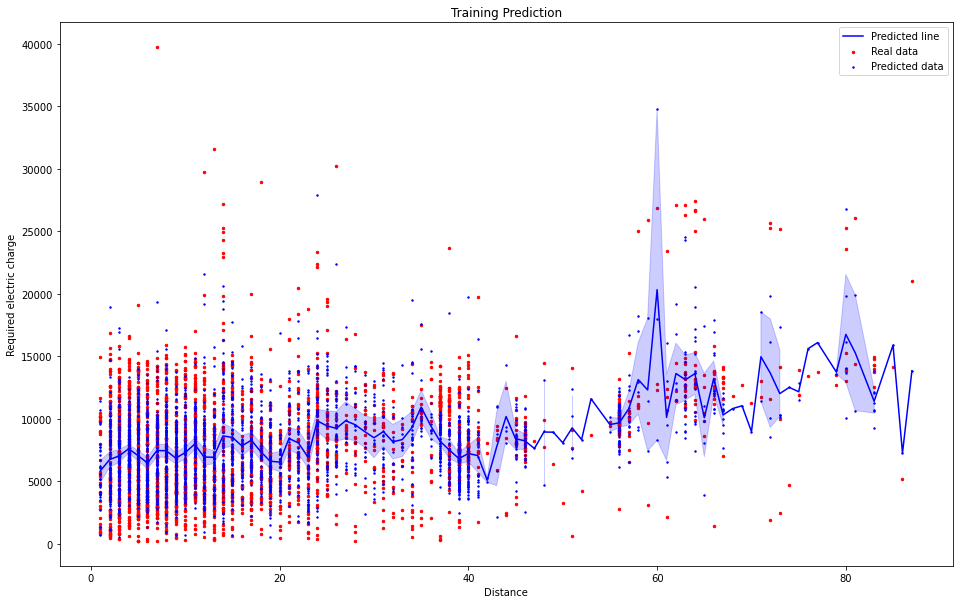

In [165]:
plt.figure(figsize=(16,10))
plt.scatter(featurescaler.inverse_transform(X_train)[:, 6], targetscaler.inverse_transform(y_train), color = 'red', label = 'Real data', s=6)
plt.scatter(featurescaler.inverse_transform(X_train)[:, 6], targetscaler.inverse_transform(finalsvr.predict(X_train).reshape(-1,1)), color = 'blue', label = 'Predicted data', s=2)
sns.lineplot(featurescaler.inverse_transform(X_train)[:, 6], targetscaler.inverse_transform(finalsvr.predict(X_train).reshape(-1,1)).reshape(1,-1)[0], color = 'blue', label = 'Predicted line')
plt.xlabel("Distance")
plt.ylabel("Required electric charge")
plt.title('Training Prediction')
plt.legend()
plt.show()

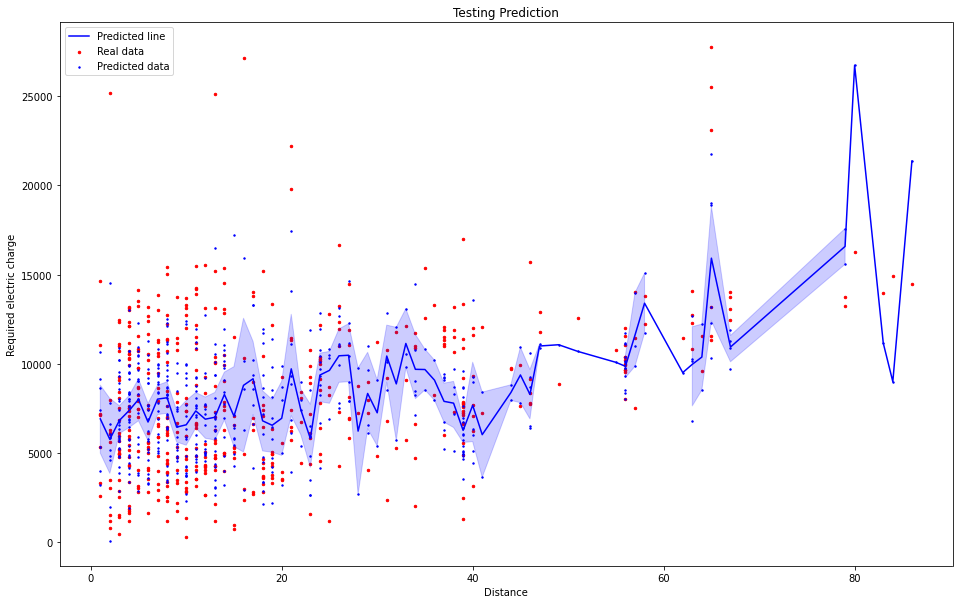

In [166]:
plt.figure(figsize=(16,10))
plt.scatter(featurescaler.inverse_transform(X_test)[:, 6], targetscaler.inverse_transform(y_test), color = 'red', label = 'Real data', s=6)
plt.scatter(featurescaler.inverse_transform(X_test)[:, 6], targetscaler.inverse_transform(y_pred_svr.reshape(-1,1)), color = 'blue', label = 'Predicted data', s=2)
sns.lineplot(featurescaler.inverse_transform(X_test)[:, 6], targetscaler.inverse_transform(y_pred_svr.reshape(-1,1)).reshape(1,-1)[0], color = 'blue', label = 'Predicted line')
plt.xlabel("Distance")
plt.ylabel("Required electric charge")
plt.title('Testing Prediction')
plt.legend()
plt.show()

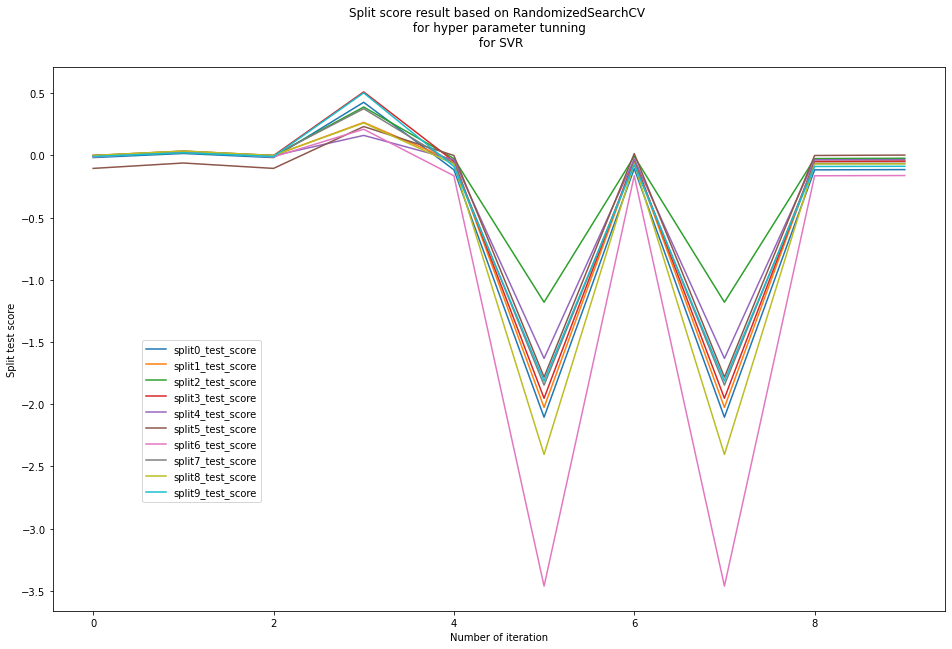

In [172]:
plt.figure(figsize=(16,10))
sns.lineplot(np.arange(0,10), svr_grid_result.cv_results_['split0_test_score'], label='split0_test_score')
sns.lineplot(np.arange(0,10), svr_grid_result.cv_results_['split1_test_score'], label='split1_test_score')
sns.lineplot(np.arange(0,10), svr_grid_result.cv_results_['split2_test_score'], label='split2_test_score')
sns.lineplot(np.arange(0,10), svr_grid_result.cv_results_['split3_test_score'], label='split3_test_score')
sns.lineplot(np.arange(0,10), svr_grid_result.cv_results_['split4_test_score'], label='split4_test_score')
sns.lineplot(np.arange(0,10), svr_grid_result.cv_results_['split5_test_score'], label='split5_test_score')
sns.lineplot(np.arange(0,10), svr_grid_result.cv_results_['split6_test_score'], label='split6_test_score')
sns.lineplot(np.arange(0,10), svr_grid_result.cv_results_['split7_test_score'], label='split7_test_score')
sns.lineplot(np.arange(0,10), svr_grid_result.cv_results_['split8_test_score'], label='split8_test_score')
sns.lineplot(np.arange(0,10), svr_grid_result.cv_results_['split9_test_score'], label='split9_test_score')
plt.xlabel('Number of iteration')
plt.ylabel('Split test score')
plt.legend(loc=[0.1,0.2])
plt.title("Split score result based on RandomizedSearchCV \n for hyper parameter tunning \n for SVR\n")
plt.show()

# Simple Linear Regression

In [175]:
linreg = linear_model.LinearRegression()

In [176]:
param_grid_linreg = {'fit_intercept': [True, False],
                    'normalize': [True, False]}

In [177]:
linreg_rsc = RandomizedSearchCV(estimator=linreg, param_distributions=param_grid_linreg, cv=10, verbose=20, random_state=0)

In [178]:
linreg_grid_result = linreg_rsc.fit(X_test, y_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] normalize=True, fit_intercept=True ..............................
[CV] .. normalize=True, fit_intercept=True, score=0.776, total=   0.0s
[CV] normalize=True, fit_intercept=True ..............................
[CV] .. normalize=True, fit_intercept=True, score=0.728, total=   0.0s
[CV] normalize=True, fit_intercept=True ..............................
[CV] .. normalize=True, fit_intercept=True, score=0.734, total=   0.0s
[CV] normalize=True, fit_intercept=True ..............................
[CV] .. normalize=True, fit_intercept=True, score=0.892, total=   0.0s
[CV] normalize=True, fit_intercept=True ..............................
[CV] .. normalize=True, fit_intercept=True, score=0.444, total=   0.0s
[CV] normalize=True, fit_intercept=True ..............................
[CV] . normalize=True, fit_intercept=True, score=-0.052, total=   0.0s
[CV] normalize=True, fit_intercept=True ..............................
[CV] .. normaliz

/Users/rashbir/opt/anaconda3/envs/Assignment1/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n

In [179]:
linreg_grid_result.best_params_

{'normalize': False, 'fit_intercept': True}

In [180]:
linreg_grid_result.best_score_

0.6541423830112516

In [181]:
finallinreg = linear_model.LinearRegression()

In [182]:
finallinreg.fit(X_train, y_train)

LinearRegression()

In [183]:
y_pred_linreg = finallinreg.predict(X_test)

In [184]:
r2_score(y_test, y_pred_linreg)

0.7440379869940259

In [185]:
print("Scaled mean_absolute_error = " + str(mean_absolute_error(y_test, y_pred_linreg)))
print("UnScaled mean_absolute_error = " + str(mean_absolute_error(targetscaler.inverse_transform(y_test), 
                                                                targetscaler.inverse_transform(y_pred_linreg))))

Scaled mean_absolute_error = 0.03356273682307883
UnScaled mean_absolute_error = 1326.7685493531294


In [186]:
print("Scaled mean_squared_error = " + str(mean_squared_error(y_test, y_pred_linreg)))
print("UnScaled mean_squared_error = " + str(mean_squared_error(targetscaler.inverse_transform(y_test), 
                                                                targetscaler.inverse_transform(y_pred_linreg))))



Scaled mean_squared_error = 0.002987165560133832
UnScaled mean_squared_error = 4668043.504321681


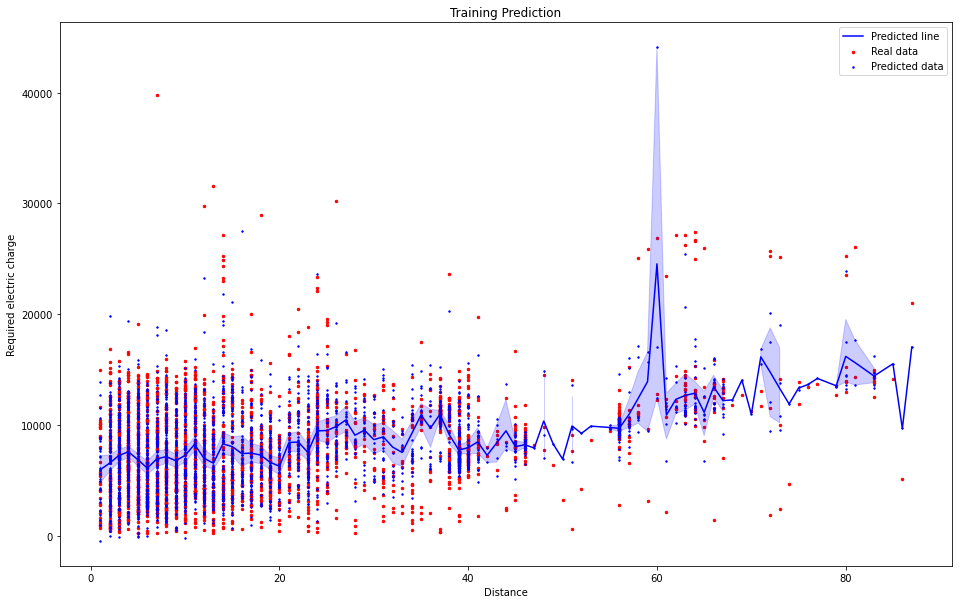

In [208]:
plt.figure(figsize=(16,10))
plt.scatter(featurescaler.inverse_transform(X_train)[:, 6], targetscaler.inverse_transform(y_train), color = 'red', label = 'Real data', s=6)
plt.scatter(featurescaler.inverse_transform(X_train)[:, 6], targetscaler.inverse_transform(finallinreg.predict(X_train)), color = 'blue', label = 'Predicted data', s=2)
sns.lineplot(featurescaler.inverse_transform(X_train)[:, 6], targetscaler.inverse_transform(finallinreg.predict(X_train)).reshape(1,-1)[0], color = 'blue', label = 'Predicted line')
plt.xlabel("Distance")
plt.ylabel("Required electric charge")
plt.title('Training Prediction')
plt.legend()
plt.show()

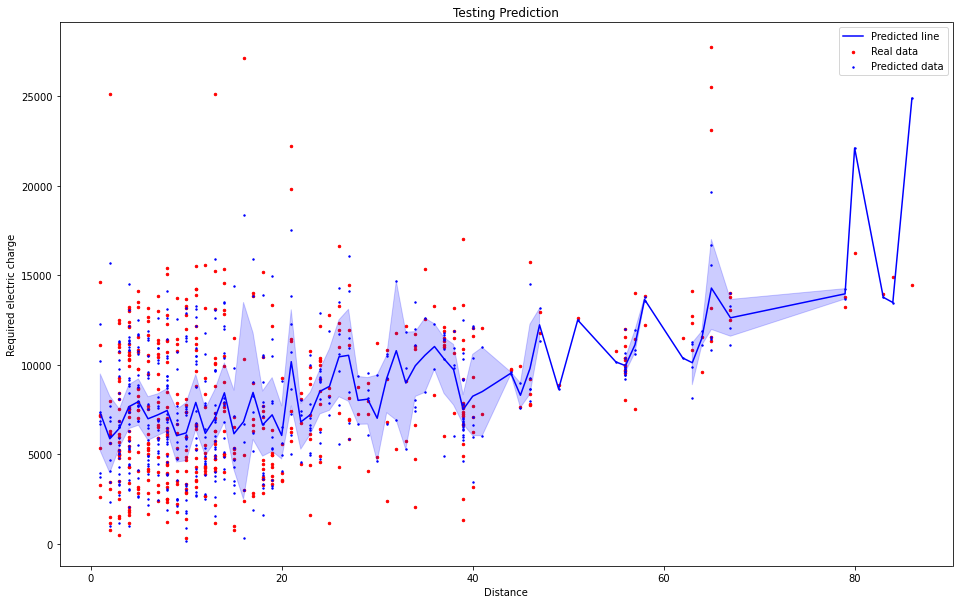

In [206]:
plt.figure(figsize=(16,10))
plt.scatter(featurescaler.inverse_transform(X_test)[:, 6], targetscaler.inverse_transform(y_test), color = 'red', label = 'Real data', s=6)
plt.scatter(featurescaler.inverse_transform(X_test)[:, 6], targetscaler.inverse_transform(y_pred_linreg), color = 'blue', label = 'Predicted data', s=2)
sns.lineplot(featurescaler.inverse_transform(X_test)[:, 6], targetscaler.inverse_transform(y_pred_linreg).reshape(1,-1)[0], color = 'blue', label = 'Predicted line')
plt.xlabel("Distance")
plt.ylabel("Required electric charge")
plt.title('Testing Prediction')
plt.legend()
plt.show()

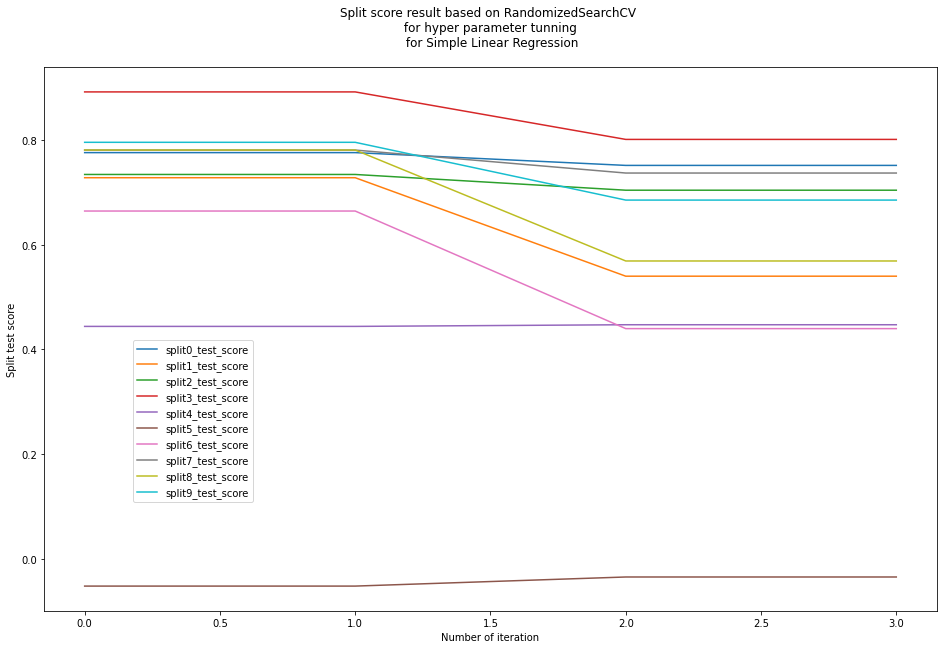

In [191]:
plt.figure(figsize=(16,10))
sns.lineplot(np.arange(0,4), linreg_grid_result.cv_results_['split0_test_score'], label='split0_test_score')
sns.lineplot(np.arange(0,4), linreg_grid_result.cv_results_['split1_test_score'], label='split1_test_score')
sns.lineplot(np.arange(0,4), linreg_grid_result.cv_results_['split2_test_score'], label='split2_test_score')
sns.lineplot(np.arange(0,4), linreg_grid_result.cv_results_['split3_test_score'], label='split3_test_score')
sns.lineplot(np.arange(0,4), linreg_grid_result.cv_results_['split4_test_score'], label='split4_test_score')
sns.lineplot(np.arange(0,4), linreg_grid_result.cv_results_['split5_test_score'], label='split5_test_score')
sns.lineplot(np.arange(0,4), linreg_grid_result.cv_results_['split6_test_score'], label='split6_test_score')
sns.lineplot(np.arange(0,4), linreg_grid_result.cv_results_['split7_test_score'], label='split7_test_score')
sns.lineplot(np.arange(0,4), linreg_grid_result.cv_results_['split8_test_score'], label='split8_test_score')
sns.lineplot(np.arange(0,4), linreg_grid_result.cv_results_['split9_test_score'], label='split9_test_score')
plt.xlabel('Number of iteration')
plt.ylabel('Split test score')
plt.legend(loc=[0.1,0.2])
plt.title("Split score result based on RandomizedSearchCV \n for hyper parameter tunning \n for Simple Linear Regression\n")
plt.show()

# Neural network

In [210]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor

In [211]:
def baseline_model(init_mode='he_normal'):
    model = Sequential()
    model.add(Dense(15, kernel_initializer=init_mode, activation = 'relu', input_dim = 15))
    model.add(Dense(units = 15, kernel_initializer=init_mode, activation = 'relu'))
    model.add(Dense(units = 15, kernel_initializer=init_mode, activation = 'relu'))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [212]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=10, verbose=10)

In [213]:
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
gridnn = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1, cv=10, verbose=10)

In [214]:
gridnn.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 34.5min finished


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

GridSearchCV(cv=10,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc273cc8190>,
             n_jobs=-1,
             param_grid={'init_mode': ['uniform', 'lecun_uniform', 'normal',
                                       'zero', 'glorot_normal',
                                       'glorot_uniform', 'he_normal',
                                       'he_uniform']},
             verbose=10)

In [215]:
gridnn.best_params_

{'init_mode': 'normal'}

In [303]:
gridnn.best_score_

-0.0036422608187422155

In [314]:
model = Sequential()
model.add(Dense(20, kernel_initializer='normal', activation = 'relu', input_dim = 20 ))
model.add(Dense(units = 10, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(units = 20, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [315]:
estimator.fit(X_train, y_train)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [316]:
y_prednn = model.predict(X_test)

In [317]:
r2_score(y_test, y_prednn)

-2.9982881377276525

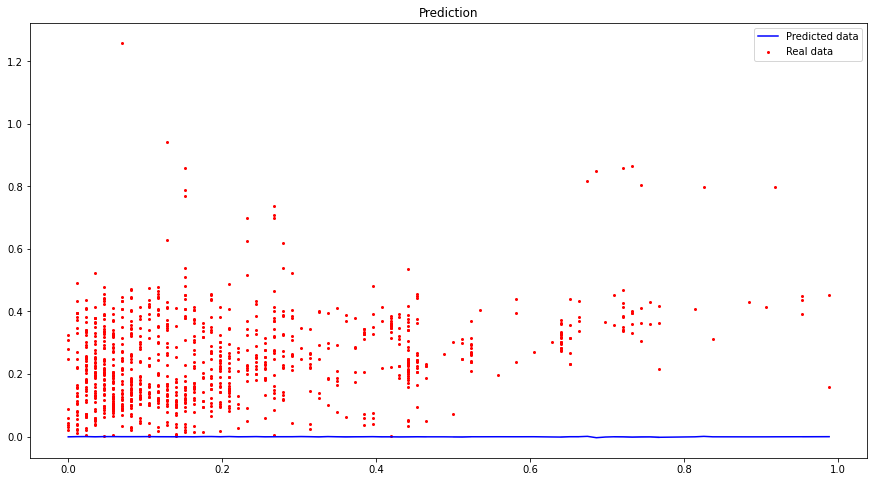

In [318]:
plt.figure(figsize=(15,8))
plt.scatter(X_test[:, 6], y_test, color = 'red', label = 'Real data', s=4)
sns.lineplot(X_test[:, 6], y_prednn.reshape(1,-1)[0], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()